In [2]:
import pandas as pd
import numpy as np
import lifelines
from patsy import dmatrix
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index
from lifelines import CoxPHFitter
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df_train = pd.read_csv('df_train_cph2.csv')
df_test = pd.read_csv('df_test_cph2.csv')

In [4]:
# CPH3

In [5]:
df_train_cph3 = df_train.copy()
df_test_cph3 = df_test.copy()

In [6]:
# Physical health feature interactions

In [7]:
# intrt1
df_train_cph3["CANCEREV_STROKEV"] = (1-df_train_cph3["CANCEREV"]) * (1-df_train_cph3["STROKEV"]) 
df_test_cph3["CANCEREV_STROKEV"] = (1-df_test_cph3["CANCEREV"]) * (1-df_test_cph3["STROKEV"])

# intrt2
#df_train_cph3["CANCEREV_HEARTATTEV"] = (1-df_train_cph3["CANCEREV"]) * (1-df_train_cph3["HEARTATTEV"]) 
#df_test_cph3["CANCEREV_HEARTATTEV"] = (1-df_test_cph3["CANCEREV"]) * (1-df_test_cph3["HEARTATTEV"])

# intrt3
#df_train_cph3["CANCEREV_LIVERCHRON"] = (1-df_train_cph3["CANCEREV"]) * (1-df_train_cph3["LIVERCHRON"]) 
#df_test_cph3["CANCEREV_LIVERCHRON"] = (1-df_test_cph3["CANCEREV"]) * (1-df_test_cph3["LIVERCHRON"])

# intrt4
#df_train_cph3["CANCEREV_LIVERCONYR"] = (1-df_train_cph3["CANCEREV"]) * (1-df_train_cph3["LIVERCONYR"]) 
#df_test_cph3["CANCEREV_LIVERCONYR"] = (1-df_test_cph3["CANCEREV"]) * (1-df_test_cph3["LIVERCONYR"])

# intrt5
#df_train_cph3["CANCEREV_CHEARTDIEV"] = (1-df_train_cph3["CANCEREV"]) * (1-df_train_cph3["CHEARTDIEV"]) 
#df_test_cph3["CANCEREV_CHEARTDIEV"] = (1-df_test_cph3["CANCEREV"]) * (1-df_test_cph3["CHEARTDIEV"])

# intrt6
#df_train_cph3["CANCEREV_HEARTCONEV"] = (1-df_train_cph3["CANCEREV"]) * (1-df_train_cph3["HEARTCONEV"]) 
#df_test_cph3["CANCEREV_HEARTCONEV"] = (1-df_test_cph3["CANCEREV"]) * (1-df_test_cph3["HEARTCONEV"])

# intrt7
df_train_cph3["CANCEREV_HYPERTENEV"] = (1-df_train_cph3["CANCEREV"]) * (1-df_train_cph3["HYPERTENEV"]) 
df_test_cph3["CANCEREV_HYPERTENEV"] = (1-df_test_cph3["CANCEREV"]) * (1-df_test_cph3["HYPERTENEV"])

# intrt8
#df_train_cph3["CANCEREV_KIDNEYWKYR"] = (1-df_train_cph3["CANCEREV"]) * (1-df_train_cph3["KIDNEYWKYR"]) 
#df_test_cph3["CANCEREV_KIDNEYWKYR"] = (1-df_test_cph3["CANCEREV"]) * (1-df_test_cph3["KIDNEYWKYR"])

# intrt9
df_train_cph3["STROKEV_HEARTATTEV"] = (1-df_train_cph3["STROKEV"]) * (1-df_train_cph3["HEARTATTEV"]) 
df_test_cph3["STROKEV_HEARTATTEV"] = (1-df_test_cph3["STROKEV"]) * (1-df_test_cph3["HEARTATTEV"])

# intrt10
#df_train_cph3["STROKEV_DIABETICEV"] = (1-df_train_cph3["STROKEV"]) * (1-df_train_cph3["DIABETICEV"]) 
#df_test_cph3["STROKEV_DIABETICEV"] = (1-df_test_cph3["STROKEV"]) * (1-df_test_cph3["DIABETICEV"])

# intrt11
#df_train_cph3["STROKEV_CHEARTDIEV"] = (1-df_train_cph3["STROKEV"]) * (1-df_train_cph3["CHEARTDIEV"]) 
#df_test_cph3["STROKEV_CHEARTDIEV"] = (1-df_test_cph3["STROKEV"]) * (1-df_test_cph3["CHEARTDIEV"])

# intrt12
#df_train_cph3["STROKEV_HEARTCONEV"] = (1-df_train_cph3["STROKEV"]) * (1-df_train_cph3["HEARTCONEV"]) 
#df_test_cph3["STROKEV_HEARTCONEV"] = (1-df_test_cph3["STROKEV"]) * (1-df_test_cph3["HEARTCONEV"])

# intrt13
#df_train_cph3["STROKEV_HYPERTENEV"] = (1-df_train_cph3["STROKEV"]) * (1-df_train_cph3["HYPERTENEV"]) 
#df_test_cph3["STROKEV_HYPERTENEV"] = (1-df_test_cph3["STROKEV"]) * (1-df_test_cph3["HYPERTENEV"])

# intrt14
#df_train_cph3["STROKEV_KIDNEYWKYR"] = (1-df_train_cph3["STROKEV"]) * (1-df_train_cph3["KIDNEYWKYR"]) 
#df_test_cph3["STROKEV_KIDNEYWKYR"] = (1-df_test_cph3["STROKEV"]) * (1-df_test_cph3["KIDNEYWKYR"])

# intrt15
#df_train_cph3["HEARTATTEV_HYPERTENEV"] = (1-df_train_cph3["HEARTATTEV"]) * (1-df_train_cph3["HYPERTENEV"]) 
#df_test_cph3["HEARTATTEV_HYPERTENEV"] = (1-df_test_cph3["HEARTATTEV"]) * (1-df_test_cph3["HYPERTENEV"])

# intrt16
#df_train_cph3["HEARTATTEV_HYPERTENEV"] = (1-df_train_cph3["HEARTATTEV"]) * (1-df_train_cph3["DIABETICEV"]) 
#df_test_cph3["HEARTATTEV_HYPERTENEV"] = (1-df_test_cph3["HEARTATTEV"]) * (1-df_test_cph3["DIABETICEV"])

# intrt17
#df_train_cph3["HYPERTENEV_DIABETICEV"] = (1-df_train_cph3["HYPERTENEV"]) * (1-df_train_cph3["DIABETICEV"]) 
#df_test_cph3["HYPERTENEV_DIABETICEV"] = (1-df_test_cph3["HYPERTENEV"]) * (1-df_test_cph3["DIABETICEV"])

# intrt18
#df_train_cph3["KIDNEYWKYR_DIABETICEV"] = (1-df_train_cph3["KIDNEYWKYR"]) * (1-df_train_cph3["DIABETICEV"]) 
#df_test_cph3["KIDNEYWKYR_DIABETICEV"] = (1-df_test_cph3["KIDNEYWKYR"]) * (1-df_test_cph3["DIABETICEV"])

# intrt19
#df_train_cph3["KIDNEYWKYR_HEARTATTEV"] = (1-df_train_cph3["KIDNEYWKYR"]) * (1-df_train_cph3["HYPERTENEV"]) 
#df_test_cph3["KIDNEYWKYR_HEARTATTEV"] = (1-df_test_cph3["KIDNEYWKYR"]) * (1-df_test_cph3["HYPERTENEV"])

# intrt20
df_train_cph3["LIVERCONYR_HEARTATTEV"] = (1-df_train_cph3["LIVERCONYR"]) * (1-df_train_cph3["HEARTATTEV"]) 
df_test_cph3["LIVERCONYR_HEARTATTEV"] = (1-df_test_cph3["LIVERCONYR"]) * (1-df_test_cph3["HEARTATTEV"])

# intrt21
df_train_cph3["LIVERCHRON_HEARTATTEV"] = (1-df_train_cph3["LIVERCHRON"]) * (1-df_train_cph3["HEARTATTEV"]) 
df_test_cph3["LIVERCHRON_HEARTATTEV"] = (1-df_test_cph3["LIVERCHRON"]) * (1-df_test_cph3["HEARTATTEV"])

In [8]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>
             duration col = 'TIMETOEVENT'
                event col = 'MORTSTAT'
      baseline estimation = breslow
   number of observations = 82720
number of events observed = 4619
   partial log-likelihood = -45522.86
         time fit was run = 2025-03-10 01:42:34 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
bs(BMICALC, degree=2, df=3)[1]   -1.11      0.33      0.14           -1.38           -0.84                0.25                0.43
bs(BMICALC, degree=2, df=3)[2]   -1.35      0.26      0.11           -1.56           -1.14                0.21                0.32
bs(BMICALC, degree=2, df=3)[3]   -0.66      0.52      0.21           -1.08           -0.24                0.34                0.78
bs(HRSLEEP, degree=1, df=2)[1]   -0.32      0.73      0.10           -0.51           -0.13                0.60                0.88
bs(HRSLEEP, degree=1, df=2)[2]    0.68      1.97      0.11            0.47            0.88                1.60                2.42
bs(STRONGFWK, degree=2, df=2)[1] -0.27      0.76      0.14           -0.54            0.01                0.58                1.01
bs(STRONGFWK, degree=2, df=2)[2]  0.05      1.05      0.10           -0.15            0.25                0.86                1.28
bs(ALCDAYSYR, degree=1, df=2)[1] -0.23      0.79      0.08           -0.38           -0.08                0.68                0.92
bs(ALCDAYSYR, degree=1, df=2)[2] -0.35      0.71      0.08           -0.51           -0.18                0.60                0.83
bs(ALCAMT, degree=2, df=2)[1]     0.63      1.88      0.21            0.21            1.05                1.23                2.85
bs(ALCAMT, degree=2, df=2)[2]     0.25      1.28      0.14           -0.04            0.53                0.96                1.70
bs(POVERTY, degree=2, df=2)[1]   -0.04      0.96      0.09           -0.22            0.13                0.80                1.14
bs(POVERTY, degree=2, df=2)[2]   -0.43      0.65      0.06           -0.54           -0.31                0.58                0.73
AEFFORT                           0.07      1.07      0.02            0.03            0.11                1.03                1.11
AFEELINT1MO                      -0.05      0.95      0.02           -0.08           -0.01                0.92                0.99
AGE                               0.07      1.07      0.00            0.07            0.07                1.07                1.08
ALC5UPYR                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ALCSTAT1_2                        0.02      1.02      0.04           -0.07            0.10                0.93                1.11
ALCSTAT1_3                       -0.18      0.83      0.09           -0.36           -0.01                0.70                0.99
ARTHGLUPEV                       -0.03      0.97      0.03           -0.10            0.03                0.91                1.03
AWORTHLESS                        0.01      1.01      0.02           -0.04            0.05                0.96                1.05
BLIND                             0.58      1.79      0.11            0.37            0.80                1.45                2.22
CANCEREV                          0.55      1.74      0.06            0.44            0.67                1.55                1.95
CANCEREV_HYPERTENEV              -0.33      0.72      0.07           -0.47           -0.20                0.62                0.82
CANCEREV_STROKEV                 -0.17      0.85      0.10           -0.37            0.03                0.69                1.03
CHEARTDIEV                        0.17      1.19      0.04            0.08            0

In [9]:
print(f'APLL_is: {cph.score(df_train_cph3, scoring_method="log_likelihood"):.4f}')
print(f'APLL_os: {cph.score(df_test_cph3, scoring_method="log_likelihood"):.4f}')
print(f'C_is: {cph.score(df_train_cph3, scoring_method="concordance_index"):.4f}')
print(f'C_os: {cph.score(df_test_cph3, scoring_method="concordance_index"):.4f}')

APLL_is: -0.5503
APLL_os: -0.4605
C_is: 0.8858
C_os: 0.8898


In [10]:
# predict the survival function for each individual
survival_probs_16_train = cph.predict_survival_function(df_train_cph3)
survival_probs_16_test = cph.predict_survival_function(df_test_cph3)

# extract 3y survival probabilities
survival_prob_3y_train = survival_probs_16_train.iloc[3] 
survival_prob_3y_test = survival_probs_16_test.iloc[3] 

# get 3-year event status based on TIMETOEVENT and MORTSTAT
status_3y_train = np.where((df_train_cph3["MORTSTAT"] == 1) & (df_train_cph3["TIMETOEVENT"] <= 3), 0, 1)
status_3y_test = np.where((df_test_cph3["MORTSTAT"] == 1) & (df_test_cph3["TIMETOEVENT"] <= 3), 0, 1)

print(f'log-loss is: {log_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'log-loss os: {log_loss(status_3y_test, survival_prob_3y_test):.4f}')
print(f'BS is: {brier_score_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'BS os: {brier_score_loss(status_3y_test, survival_prob_3y_test):.4f}')

log-loss is: 0.1121
log-loss os: 0.1100
BS is: 0.0294
BS os: 0.0293


In [11]:
# Aging effects on physical health conditions

In [12]:
# intrt22
df_train_cph3["AGE_CANCEREV"] = df_train_cph3["AGE"] * (1-df_train_cph3["CANCEREV"]) 
df_test_cph3["AGE_CANCEREV"] = df_test_cph3["AGE"] * (1-df_test_cph3["CANCEREV"])

# intrt23
#df_train_cph3["AGE_HEARTATTEV"] = df_train_cph3["AGE"] * (1-df_train_cph3["HEARTATTEV"]) 
#df_test_cph3["AGE_HEARTATTEV"] = df_test_cph3["AGE"] * (1-df_test_cph3["HEARTATTEV"])

# intrt24
#df_train_cph3["AGE_HEARTCONEV"] = df_train_cph3["AGE"] * (1-df_train_cph3["HEARTCONEV"]) 
#df_test_cph3["AGE_HEARTCONEV"] = df_test_cph3["AGE"] * (1-df_test_cph3["HEARTCONEV"])

# intrt25
#df_train_cph3["AGE_HYPERTENEV"] = df_train_cph3["AGE"] * (1-df_train_cph3["HYPERTENEV"]) 
#df_test_cph3["AGE_HYPERTENEV"] = df_test_cph3["AGE"] * (1-df_test_cph3["HYPERTENEV"])

# intrt26
df_train_cph3["AGE_KIDNEYWKYR"] = df_train_cph3["AGE"] * (1-df_train_cph3["KIDNEYWKYR"]) 
df_test_cph3["AGE_KIDNEYWKYR"] = df_test_cph3["AGE"] * (1-df_test_cph3["KIDNEYWKYR"])

# intrt27
#df_train_cph3["AGE_HEARTATTEV"] = df_train_cph3["AGE"] * (1-df_train_cph3["HEARTATTEV"]) 
#df_test_cph3["AGE_HEARTATTEV"] = df_test_cph3["AGE"] * (1-df_test_cph3["HEARTATTEV"])

# intrt28
#df_train_cph3["AGE_DIABETICEV"] = df_train_cph3["AGE"] * (1-df_train_cph3["DIABETICEV"]) 
#df_test_cph3["AGE_DIABETICEV"] = df_test_cph3["AGE"] * (1-df_test_cph3["DIABETICEV"])

In [13]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>
             duration col = 'TIMETOEVENT'
                event col = 'MORTSTAT'
      baseline estimation = breslow
   number of observations = 82720
number of events observed = 4619
   partial log-likelihood = -45506.38
         time fit was run = 2025-03-10 01:42:39 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
bs(BMICALC, degree=2, df=3)[1]   -1.10      0.33      0.14           -1.37           -0.83                0.25                0.44
bs(BMICALC, degree=2, df=3)[2]   -1.35      0.26      0.11           -1.56           -1.14                0.21                0.32
bs(BMICALC, degree=2, df=3)[3]   -0.67      0.51      0.21           -1.09           -0.25                0.34                0.78
bs(HRSLEEP, degree=1, df=2)[1]   -0.31      0.74      0.10           -0.50           -0.12                0.61                0.89
bs(HRSLEEP, degree=1, df=2)[2]    0.69      1.99      0.11            0.48            0.89                1.62                2.45
bs(STRONGFWK, degree=2, df=2)[1] -0.26      0.77      0.14           -0.53            0.02                0.59                1.02
bs(STRONGFWK, degree=2, df=2)[2]  0.05      1.05      0.10           -0.15            0.24                0.86                1.28
bs(ALCDAYSYR, degree=1, df=2)[1] -0.23      0.80      0.08           -0.37           -0.08                0.69                0.93
bs(ALCDAYSYR, degree=1, df=2)[2] -0.35      0.71      0.08           -0.51           -0.18                0.60                0.83
bs(ALCAMT, degree=2, df=2)[1]     0.63      1.88      0.21            0.21            1.05                1.24                2.86
bs(ALCAMT, degree=2, df=2)[2]     0.26      1.30      0.15           -0.02            0.55                0.98                1.73
bs(POVERTY, degree=2, df=2)[1]   -0.03      0.97      0.09           -0.20            0.14                0.81                1.16
bs(POVERTY, degree=2, df=2)[2]   -0.42      0.66      0.06           -0.54           -0.31                0.58                0.74
AEFFORT                           0.07      1.07      0.02            0.03            0.11                1.03                1.11
AFEELINT1MO                      -0.05      0.95      0.02           -0.08           -0.01                0.92                0.99
AGE                               0.07      1.08      0.00            0.07            0.08                1.07                1.08
AGE_CANCEREV                      0.01      1.01      0.00            0.01            0.02                1.01                1.02
AGE_KIDNEYWKYR                    0.02      1.02      0.00            0.01            0.02                1.01                1.02
ALC5UPYR                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ALCSTAT1_2                        0.01      1.01      0.04           -0.07            0.10                0.93                1.10
ALCSTAT1_3                       -0.19      0.83      0.09           -0.37           -0.02                0.69                0.98
ARTHGLUPEV                       -0.03      0.97      0.03           -0.10            0.03                0.91                1.03
AWORTHLESS                        0.01      1.01      0.02           -0.03            0.05                0.97                1.06
BLIND                             0.58      1.78      0.11            0.36            0.79                1.44                2.20
CANCEREV                          1.48      4.37      0.23            1.03            1.92                2.79                6.85
CANCEREV_HYPERTENEV              -0.29      0.75      0.07           -0.43           -0

In [14]:
print(f'APLL_is: {cph.score(df_train_cph3, scoring_method="log_likelihood"):.4f}')
print(f'APLL_os: {cph.score(df_test_cph3, scoring_method="log_likelihood"):.4f}')
print(f'C_is: {cph.score(df_train_cph3, scoring_method="concordance_index"):.4f}')
print(f'C_os: {cph.score(df_test_cph3, scoring_method="concordance_index"):.4f}')

APLL_is: -0.5501
APLL_os: -0.4601
C_is: 0.8860
C_os: 0.8905


In [15]:
# predict the survival function for each individual
survival_probs_16_train = cph.predict_survival_function(df_train_cph3)
survival_probs_16_test = cph.predict_survival_function(df_test_cph3)

# extract 3y survival probabilities
survival_prob_3y_train = survival_probs_16_train.iloc[3] 
survival_prob_3y_test = survival_probs_16_test.iloc[3] 

# get 3-year event status based on TIMETOEVENT and MORTSTAT
status_3y_train = np.where((df_train_cph3["MORTSTAT"] == 1) & (df_train_cph3["TIMETOEVENT"] <= 3), 0, 1)
status_3y_test = np.where((df_test_cph3["MORTSTAT"] == 1) & (df_test_cph3["TIMETOEVENT"] <= 3), 0, 1)

print(f'log-loss is: {log_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'log-loss os: {log_loss(status_3y_test, survival_prob_3y_test):.4f}')
print(f'BS is: {brier_score_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'BS os: {brier_score_loss(status_3y_test, survival_prob_3y_test):.4f}')

log-loss is: 0.1119
log-loss os: 0.1096
BS is: 0.0294
BS os: 0.0292


In [16]:
# Lifestyle effects on physical health conditions

In [17]:
# intrt29
df_train_cph3["CIGSDAY_EMPHYSEMEV"] = df_train_cph3["CIGSDAY"] * (1-df_train_cph3["EMPHYSEMEV"]) 
df_test_cph3["CIGSDAY_EMPHYSEMEV"] = df_test_cph3["CIGSDAY"] * (1-df_test_cph3["EMPHYSEMEV"])

# intrt30
#df_train_cph3["CIGSDAY_CANCEREV"] = df_train_cph3["CIGSDAY"] * (1-df_train_cph3["CANCEREV"]) 
#df_test_cph3["CIGSDAY_CANCEREV"] = df_test_cph3["CIGSDAY"] * (1-df_test_cph3["CANCEREV"])

# intrt31
#df_train_cph3["HEARTATTEV_STRONGFWK"] = (df_train_cph3["SMOKESTATUS2_12.0"]) * (df_train_cph3["CIGSDAY"]) 
#df_test_cph3["HEARTATTEV_STRONGFWK"] = (df_test_cph3["SMOKESTATUS2_12.0"]) * (df_test_cph3["CIGSDAY"])

# intrt32
#df_train_cph3["DIABETICEV_VIG10FWK"] = (1-df_train_cph3["DIABETICEV"]) * (df_train_cph3["VIG10FWK"]) 
#df_test_cph3["DIABETICEV_VIG10FWK"] = (1-df_test_cph3["DIABETICEV"]) * (df_test_cph3["VIG10FWK"])

# intrt33
#df_train_cph3["DIABETICEV_MOD10FWK"] = (1-df_train_cph3["DIABETICEV"]) * (df_train_cph3["MOD10FWK"]) 
#df_test_cph3["DIABETICEV_MOD10FWK"] = (1-df_test_cph3["DIABETICEV"]) * (df_test_cph3["MOD10FWK"])

# intrt34
#df_train_cph3["DIABETICEV_STRONGFWK"] = (1-df_train_cph3["DIABETICEV"]) * (df_train_cph3["STRONGFWK"]) 
#df_test_cph3["DIABETICEV_STRONGFWK"] = (1-df_test_cph3["DIABETICEV"]) * (df_test_cph3["STRONGFWK"])

# intrt35
#df_train_cph3["HYPERTENEV_VIG10FWK"] = (1-df_train_cph3["HYPERTENEV"]) * (df_train_cph3["VIG10FWK"]) 
#df_test_cph3["HYPERTENEV_VIG10FWK"] = (1-df_test_cph3["HYPERTENEV"]) * (df_test_cph3["VIG10FWK"])

# intrt36
#df_train_cph3["HYPERTENEV_MOD10FWK"] = (1-df_train_cph3["HYPERTENEV"]) * (df_train_cph3["MOD10FWK"]) 
#df_test_cph3["HYPERTENEV_MOD10FWK"] = (1-df_test_cph3["HYPERTENEV"]) * (df_test_cph3["MOD10FWK"])

# intrt37
df_train_cph3["HYPERTENEV_STRONGFWK"] = (1-df_train_cph3["HYPERTENEV"]) * (df_train_cph3["STRONGFWK"]) 
df_test_cph3["HYPERTENEV_STRONGFWK"] = (1-df_test_cph3["HYPERTENEV"]) * (df_test_cph3["STRONGFWK"])

# intrt38
#df_train_cph3["LIVERCHRON_ALCAMT"] = (1-df_train_cph3["LIVERCHRON"]) * (df_train_cph3["ALCAMT"]) 
#df_test_cph3["LIVERCHRON_ALCAMT"] = (1-df_test_cph3["LIVERCHRON"]) * (df_test_cph3["ALCAMT"])

# intrt39
#df_train_cph3["LIVERCHRON_ALC5UPYR"] = (1-df_train_cph3["LIVERCHRON"]) * (df_train_cph3["ALC5UPYR"]) 
#df_test_cph3["LIVERCHRON_ALC5UPYR"] = (1-df_test_cph3["LIVERCHRON"]) * (df_test_cph3["ALC5UPYR"])

# intrt40
#df_train_cph3["LIVERCONYR_ALCAMT"] = (1-df_train_cph3["LIVERCONYR"]) * (df_train_cph3["ALCAMT"]) 
#df_test_cph3["LIVERCONYR_ALCAMT"] = (1-df_test_cph3["LIVERCONYR"]) * (df_test_cph3["ALCAMT"])

# intrt41
#df_train_cph3["LIVERCONYR_ALC5UPYR"] = (1-df_train_cph3["LIVERCONYR"]) * (df_train_cph3["ALC5UPYR"]) 
#df_test_cph3["LIVERCONYR_ALC5UPYR"] = (1-df_test_cph3["LIVERCONYR"]) * (df_test_cph3["ALC5UPYR"])

In [18]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>
             duration col = 'TIMETOEVENT'
                event col = 'MORTSTAT'
      baseline estimation = breslow
   number of observations = 82720
number of events observed = 4619
   partial log-likelihood = -45496.39
         time fit was run = 2025-03-10 01:42:44 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
bs(BMICALC, degree=2, df=3)[1]   -1.11      0.33      0.14           -1.38           -0.83                0.25                0.43
bs(BMICALC, degree=2, df=3)[2]   -1.35      0.26      0.11           -1.56           -1.14                0.21                0.32
bs(BMICALC, degree=2, df=3)[3]   -0.68      0.51      0.21           -1.10           -0.26                0.33                0.77
bs(HRSLEEP, degree=1, df=2)[1]   -0.31      0.73      0.10           -0.50           -0.12                0.61                0.89
bs(HRSLEEP, degree=1, df=2)[2]    0.68      1.98      0.11            0.48            0.89                1.61                2.44
bs(STRONGFWK, degree=2, df=2)[1] -0.39      0.67      0.15           -0.68           -0.11                0.51                0.90
bs(STRONGFWK, degree=2, df=2)[2] -0.32      0.73      0.15           -0.62           -0.02                0.54                0.98
bs(ALCDAYSYR, degree=1, df=2)[1] -0.22      0.80      0.08           -0.37           -0.08                0.69                0.93
bs(ALCDAYSYR, degree=1, df=2)[2] -0.34      0.71      0.08           -0.51           -0.18                0.60                0.84
bs(ALCAMT, degree=2, df=2)[1]     0.62      1.87      0.21            0.21            1.04                1.23                2.84
bs(ALCAMT, degree=2, df=2)[2]     0.25      1.29      0.14           -0.03            0.54                0.97                1.71
bs(POVERTY, degree=2, df=2)[1]   -0.04      0.96      0.09           -0.21            0.14                0.81                1.15
bs(POVERTY, degree=2, df=2)[2]   -0.42      0.66      0.06           -0.54           -0.31                0.58                0.73
AEFFORT                           0.07      1.07      0.02            0.03            0.11                1.03                1.12
AFEELINT1MO                      -0.05      0.96      0.02           -0.08           -0.01                0.92                0.99
AGE                               0.07      1.08      0.00            0.07            0.08                1.07                1.08
AGE_CANCEREV                      0.01      1.01      0.00            0.01            0.02                1.01                1.02
AGE_KIDNEYWKYR                    0.02      1.02      0.00            0.01            0.02                1.01                1.02
ALC5UPYR                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ALCSTAT1_2                        0.01      1.01      0.04           -0.07            0.10                0.93                1.10
ALCSTAT1_3                       -0.19      0.83      0.09           -0.37           -0.01                0.69                0.99
ARTHGLUPEV                       -0.03      0.97      0.03           -0.09            0.03                0.91                1.03
AWORTHLESS                        0.01      1.01      0.02           -0.04            0.05                0.97                1.05
BLIND                             0.59      1.80      0.11            0.37            0.80                1.45                2.22
CANCEREV                          1.49      4.44      0.23            1.04            1.94                2.84                6.96
CANCEREV_HYPERTENEV              -0.29      0.75      0.07           -0.42           -0

In [19]:
print(f'APLL_is: {cph.score(df_train_cph3, scoring_method="log_likelihood"):.4f}')
print(f'APLL_os: {cph.score(df_test_cph3, scoring_method="log_likelihood"):.4f}')
print(f'C_is: {cph.score(df_train_cph3, scoring_method="concordance_index"):.4f}')
print(f'C_os: {cph.score(df_test_cph3, scoring_method="concordance_index"):.4f}')

APLL_is: -0.5500
APLL_os: -0.4600
C_is: 0.8863
C_os: 0.8906


In [20]:
# predict the survival function for each individual
survival_probs_16_train = cph.predict_survival_function(df_train_cph3)
survival_probs_16_test = cph.predict_survival_function(df_test_cph3)

# extract 3y survival probabilities
survival_prob_3y_train = survival_probs_16_train.iloc[3] 
survival_prob_3y_test = survival_probs_16_test.iloc[3] 

# get 3-year event status based on TIMETOEVENT and MORTSTAT
status_3y_train = np.where((df_train_cph3["MORTSTAT"] == 1) & (df_train_cph3["TIMETOEVENT"] <= 3), 0, 1)
status_3y_test = np.where((df_test_cph3["MORTSTAT"] == 1) & (df_test_cph3["TIMETOEVENT"] <= 3), 0, 1)

print(f'log-loss is: {log_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'log-loss os: {log_loss(status_3y_test, survival_prob_3y_test):.4f}')
print(f'BS is: {brier_score_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'BS os: {brier_score_loss(status_3y_test, survival_prob_3y_test):.4f}')

log-loss is: 0.1118
log-loss os: 0.1095
BS is: 0.0294
BS os: 0.0292


In [21]:
# Compounded Lifestyle Effects

In [22]:
# intrt42
#df_train_cph3["MOD10FWK_MOD10DMIN"] = (df_train_cph3["MOD10FWK"]) * (df_train_cph3["MOD10DMIN"]) 
#df_test_cph3["MOD10FWK_MOD10DMIN"] = (df_test_cph3["MOD10FWK"]) * (df_test_cph3["MOD10DMIN"])

# intrt43
#df_train_cph3["VIG10FWK_VIG10DMIN"] = (df_train_cph3["VIG10FWK"]) * (df_train_cph3["VIG10DMIN"]) 
#df_test_cph3["VIG10FWK_VIG10DMIN"] = (df_test_cph3["VIG10FWK"]) * (df_test_cph3["VIG10DMIN"])

# intrt44
#df_train_cph3["MOD10FWK_CIGSDAY"] = (df_train_cph3["MOD10FWK"]) * (df_train_cph3["CIGSDAY"]) 
#df_test_cph3["MOD10FWK_CIGSDAY"] = (df_test_cph3["MOD10FWK"]) * (df_test_cph3["CIGSDAY"])

# intrt45
#df_train_cph3["VIG10FWK_CIGSDAY"] = (df_train_cph3["VIG10FWK"]) * (df_train_cph3["CIGSDAY"]) 
#df_test_cph3["VIG10FWK_CIGSDAY"] = (df_test_cph3["VIG10FWK"]) * (df_test_cph3["CIGSDAY"])

# intrt46
#df_train_cph3["ALCAMT_CIGSDAY"] = (df_train_cph3["ALCAMT"]) * (df_train_cph3["CIGSDAY"]) 
#df_test_cph3["ALCAMT_CIGSDAY"] = (df_test_cph3["ALCAMT"]) * (df_test_cph3["CIGSDAY"])

# intrt47
#df_train_cph3["ALC5UPYR_CIGSDAY"] = (df_train_cph3["ALC5UPYR"]) * (df_train_cph3["CIGSDAY"]) 
#df_test_cph3["ALC5UPYR_CIGSDAY"] = (df_test_cph3["ALC5UPYR"]) * (df_test_cph3["CIGSDAY"])

# intrt48
#df_train_cph3["VIG10FWK_STRONGFWK"] = (df_train_cph3["VIG10FWK"]) * (df_train_cph3["STRONGFWK"]) 
#df_test_cph3["VIG10FWK_STRONGFWK"] = (df_test_cph3["VIG10FWK"]) * (df_test_cph3["STRONGFWK"])

In [23]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>
             duration col = 'TIMETOEVENT'
                event col = 'MORTSTAT'
      baseline estimation = breslow
   number of observations = 82720
number of events observed = 4619
   partial log-likelihood = -45496.39
         time fit was run = 2025-03-10 01:42:49 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
bs(BMICALC, degree=2, df=3)[1]   -1.11      0.33      0.14           -1.38           -0.83                0.25                0.43
bs(BMICALC, degree=2, df=3)[2]   -1.35      0.26      0.11           -1.56           -1.14                0.21                0.32
bs(BMICALC, degree=2, df=3)[3]   -0.68      0.51      0.21           -1.10           -0.26                0.33                0.77
bs(HRSLEEP, degree=1, df=2)[1]   -0.31      0.73      0.10           -0.50           -0.12                0.61                0.89
bs(HRSLEEP, degree=1, df=2)[2]    0.68      1.98      0.11            0.48            0.89                1.61                2.44
bs(STRONGFWK, degree=2, df=2)[1] -0.39      0.67      0.15           -0.68           -0.11                0.51                0.90
bs(STRONGFWK, degree=2, df=2)[2] -0.32      0.73      0.15           -0.62           -0.02                0.54                0.98
bs(ALCDAYSYR, degree=1, df=2)[1] -0.22      0.80      0.08           -0.37           -0.08                0.69                0.93
bs(ALCDAYSYR, degree=1, df=2)[2] -0.34      0.71      0.08           -0.51           -0.18                0.60                0.84
bs(ALCAMT, degree=2, df=2)[1]     0.62      1.87      0.21            0.21            1.04                1.23                2.84
bs(ALCAMT, degree=2, df=2)[2]     0.25      1.29      0.14           -0.03            0.54                0.97                1.71
bs(POVERTY, degree=2, df=2)[1]   -0.04      0.96      0.09           -0.21            0.14                0.81                1.15
bs(POVERTY, degree=2, df=2)[2]   -0.42      0.66      0.06           -0.54           -0.31                0.58                0.73
AEFFORT                           0.07      1.07      0.02            0.03            0.11                1.03                1.12
AFEELINT1MO                      -0.05      0.96      0.02           -0.08           -0.01                0.92                0.99
AGE                               0.07      1.08      0.00            0.07            0.08                1.07                1.08
AGE_CANCEREV                      0.01      1.01      0.00            0.01            0.02                1.01                1.02
AGE_KIDNEYWKYR                    0.02      1.02      0.00            0.01            0.02                1.01                1.02
ALC5UPYR                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ALCSTAT1_2                        0.01      1.01      0.04           -0.07            0.10                0.93                1.10
ALCSTAT1_3                       -0.19      0.83      0.09           -0.37           -0.01                0.69                0.99
ARTHGLUPEV                       -0.03      0.97      0.03           -0.09            0.03                0.91                1.03
AWORTHLESS                        0.01      1.01      0.02           -0.04            0.05                0.97                1.05
BLIND                             0.59      1.80      0.11            0.37            0.80                1.45                2.22
CANCEREV                          1.49      4.44      0.23            1.04            1.94                2.84                6.96
CANCEREV_HYPERTENEV              -0.29      0.75      0.07           -0.42           -0

In [24]:
print(f'APLL_is: {cph.score(df_train_cph3, scoring_method="log_likelihood"):.4f}')
print(f'APLL_os: {cph.score(df_test_cph3, scoring_method="log_likelihood"):.4f}')
print(f'C_is: {cph.score(df_train_cph3, scoring_method="concordance_index"):.4f}')
print(f'C_os: {cph.score(df_test_cph3, scoring_method="concordance_index"):.4f}')

APLL_is: -0.5500
APLL_os: -0.4600
C_is: 0.8863
C_os: 0.8906


In [25]:
# predict the survival function for each individual
survival_probs_16_train = cph.predict_survival_function(df_train_cph3)
survival_probs_16_test = cph.predict_survival_function(df_test_cph3)

# extract 3y survival probabilities
survival_prob_3y_train = survival_probs_16_train.iloc[3] 
survival_prob_3y_test = survival_probs_16_test.iloc[3] 

# get 3-year event status based on TIMETOEVENT and MORTSTAT
status_3y_train = np.where((df_train_cph3["MORTSTAT"] == 1) & (df_train_cph3["TIMETOEVENT"] <= 3), 0, 1)
status_3y_test = np.where((df_test_cph3["MORTSTAT"] == 1) & (df_test_cph3["TIMETOEVENT"] <= 3), 0, 1)

print(f'log-loss is: {log_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'log-loss os: {log_loss(status_3y_test, survival_prob_3y_test):.4f}')
print(f'BS is: {brier_score_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'BS os: {brier_score_loss(status_3y_test, survival_prob_3y_test):.4f}')

log-loss is: 0.1118
log-loss os: 0.1095
BS is: 0.0294
BS os: 0.0292


In [26]:
# plot mf(2,2)cigs(1,2)

In [27]:
# 1. copy (because this is just trial)
df_train_cph3_copy = df_train_cph3.copy()  
df_test_cph3_copy = df_test_cph3.copy()

# 2. generate splines on TRAINING data
modf_spline_train = dmatrix("bs(MOD10FWK, degree=2, df=2) - 1", df_train_cph3_copy, return_type='dataframe')
cigs_spline_train = dmatrix("bs(CIGSDAY, degree=1, df=2) - 1", df_train_cph3_copy, return_type='dataframe')

# 3. use the fitted splines to compute for the TEST data
modf_spline_test = dmatrix(modf_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')
cigs_spline_test = dmatrix(cigs_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')

# 4. sssign spline components
df_train_cph3_copy["MOD10FWK_spline1"] = modf_spline_train.iloc[:, 0]
df_train_cph3_copy["MOD10FWK_spline2"] = modf_spline_train.iloc[:, -1]
df_train_cph3_copy["CIGSDAY_spline1"] = cigs_spline_train.iloc[:, 0]
df_train_cph3_copy["CIGSDAY_spline2"] = cigs_spline_train.iloc[:, -1]

df_test_cph3_copy["MOD10FWK_spline1"] = modf_spline_test.iloc[:, 0]
df_test_cph3_copy["MOD10FWK_spline2"] = modf_spline_test.iloc[:, -1]
df_test_cph3_copy["CIGSDAY_spline1"] = cigs_spline_test.iloc[:, 0]
df_test_cph3_copy["CIGSDAY_spline2"] = cigs_spline_test.iloc[:, -1]

# 5. create interaction terms
df_train_cph3_copy["CIGSDAY_MOD10FWK_11"] = df_train_cph3_copy["MOD10FWK_spline1"] * df_train_cph3_copy["CIGSDAY_spline1"]
df_train_cph3_copy["CIGSDAY_MOD10FWK_12"] = df_train_cph3_copy["MOD10FWK_spline1"] * df_train_cph3_copy["CIGSDAY_spline2"]
df_train_cph3_copy["CIGSDAY_MOD10FWK_21"] = df_train_cph3_copy["MOD10FWK_spline2"] * df_train_cph3_copy["CIGSDAY_spline1"]
df_train_cph3_copy["CIGSDAY_MOD10FWK_22"] = df_train_cph3_copy["MOD10FWK_spline2"] * df_train_cph3_copy["CIGSDAY_spline2"]

df_test_cph3_copy["CIGSDAY_MOD10FWK_11"] = df_test_cph3_copy["MOD10FWK_spline1"] * df_test_cph3_copy["CIGSDAY_spline1"]
df_test_cph3_copy["CIGSDAY_MOD10FWK_12"] = df_test_cph3_copy["MOD10FWK_spline1"] * df_test_cph3_copy["CIGSDAY_spline2"]
df_test_cph3_copy["CIGSDAY_MOD10FWK_21"] = df_test_cph3_copy["MOD10FWK_spline2"] * df_test_cph3_copy["CIGSDAY_spline1"]
df_test_cph3_copy["CIGSDAY_MOD10FWK_22"] = df_test_cph3_copy["MOD10FWK_spline2"] * df_test_cph3_copy["CIGSDAY_spline2"]

# 6. remove columns
df_train_cph3_copy = df_train_cph3_copy.drop(columns=['MOD10FWK_spline1', 'MOD10FWK_spline2', 'CIGSDAY_spline1', 'CIGSDAY_spline2'])
df_test_cph3_copy = df_test_cph3_copy.drop(columns=['MOD10FWK_spline1', 'MOD10FWK_spline2', 'CIGSDAY_spline1', 'CIGSDAY_spline2'])

In [28]:
# fit model
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3_copy.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY', 'MOD10FWK']))

cph = CoxPHFitter()
cph.fit(df_train_cph3_copy, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

#cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>

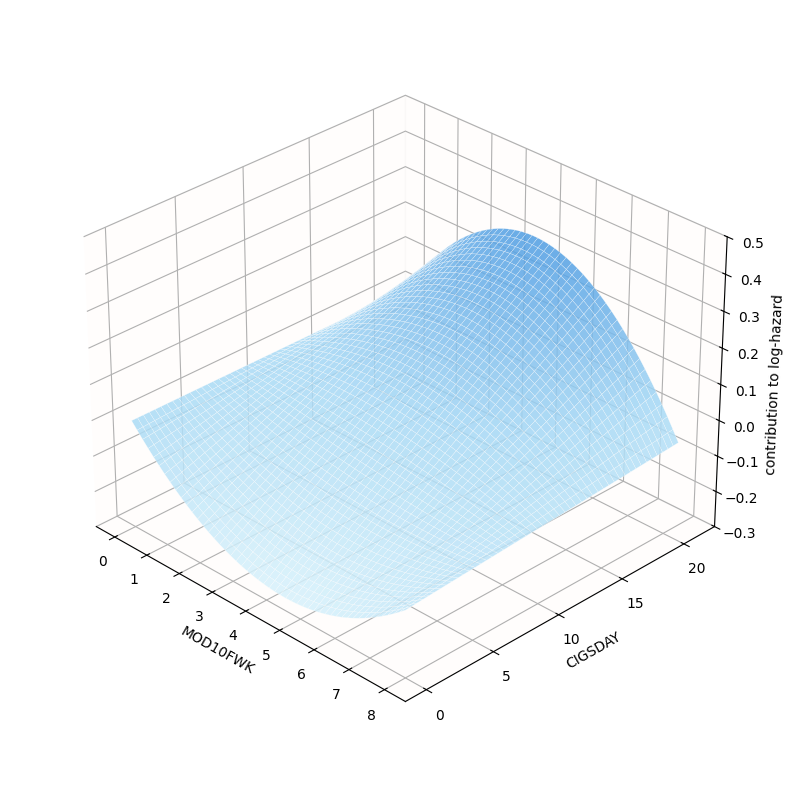

In [29]:
# define coefficient values from the fitted Cox model
beta_11 = cph.params_["CIGSDAY_MOD10FWK_11"]
beta_12 = cph.params_["CIGSDAY_MOD10FWK_12"]
beta_21 = cph.params_["CIGSDAY_MOD10FWK_21"]
beta_22 = cph.params_["CIGSDAY_MOD10FWK_22"]

# create a meshgrid for MOD10FWK and CIGSDAY values
MOD10FWK_range = np.linspace(df_train_cph3["MOD10FWK"].min(), df_train_cph3["MOD10FWK"].max(), 50)
CIGSDAY_range = np.linspace(df_train_cph3["CIGSDAY"].min(), df_train_cph3["CIGSDAY"].max(), 50)
MOD10FWK_grid, CIGSDAY_grid = np.meshgrid(MOD10FWK_range, CIGSDAY_range)

# compute spline transformations for the grid
modf_spline_grid = dmatrix(modf_spline_train.design_info, {"MOD10FWK": MOD10FWK_grid.ravel()}, return_type="dataframe")
cigs_spline_grid = dmatrix(cigs_spline_train.design_info, {"CIGSDAY": CIGSDAY_grid.ravel()}, return_type="dataframe")

# compute interaction terms
CIGSDAY_MOD10FWK_11_grid = modf_spline_grid.iloc[:, 0] * cigs_spline_grid.iloc[:, 0]
CIGSDAY_MOD10FWK_12_grid = modf_spline_grid.iloc[:, 0] * cigs_spline_grid.iloc[:, -1]
CIGSDAY_MOD10FWK_21_grid = modf_spline_grid.iloc[:, -1] * cigs_spline_grid.iloc[:, 0]
CIGSDAY_MOD10FWK_22_grid = modf_spline_grid.iloc[:, -1] * cigs_spline_grid.iloc[:, -1]

# compute cumulative log-hazard
log_hazard_grid = (beta_11 * CIGSDAY_MOD10FWK_11_grid + beta_12 * CIGSDAY_MOD10FWK_12_grid + 
                   beta_21 * CIGSDAY_MOD10FWK_21_grid + beta_22 * CIGSDAY_MOD10FWK_22_grid).values.reshape(50, 50)

# ---plot---
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

# define c map
colors_baby_blue = ["#D6F1FB", "#A5D8F5", "#509EE3"]  
custom_cmap_baby_blue = LinearSegmentedColormap.from_list("BabyBlueCmap", colors_baby_blue)


ax.plot_surface(
    MOD10FWK_grid, CIGSDAY_grid, log_hazard_grid,
    cmap=custom_cmap_baby_blue,  
    alpha=0.85,    
    edgecolor="white", linewidth=0.2)  

ax.view_init(elev=30, azim=-45)
ax.set_xlabel("MOD10FWK")
ax.set_ylabel("CIGSDAY")
ax.set_zlabel("contribution to log-hazard")
ax.set_zlim(-0.3, 0.5) 
ax.set_facecolor("white")  

# adjust the XYZ planes color
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))  
ax.yaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))
ax.zaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))

ax.set_box_aspect(None, zoom=0.9) 
plt.tight_layout()
plt.savefig("MOD_CIG_3D_2212.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [30]:
# plot vf(2,2)cigs(1,2)

In [31]:
# 1. copy (because this is just trial)
df_train_cph3_copy = df_train_cph3.copy()  
df_test_cph3_copy = df_test_cph3.copy()

# 2. generate splines on TRAINING data
vigf_spline_train = dmatrix("bs(VIG10FWK, degree=2, df=2) - 1", df_train_cph3_copy, return_type='dataframe')
cigs_spline_train = dmatrix("bs(CIGSDAY, degree=1, df=2) - 1", df_train_cph3_copy, return_type='dataframe')

# 3. use the fitted splines to compute for the TEST data
vigf_spline_test = dmatrix(vigf_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')
cigs_spline_test = dmatrix(cigs_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')

# 4. sssign spline components
df_train_cph3_copy["VIG10FWK_spline1"] = vigf_spline_train.iloc[:, 0]
df_train_cph3_copy["VIG10FWK_spline2"] = vigf_spline_train.iloc[:, -1]
df_train_cph3_copy["CIGSDAY_spline1"] = cigs_spline_train.iloc[:, 0]
df_train_cph3_copy["CIGSDAY_spline2"] = cigs_spline_train.iloc[:, -1]

df_test_cph3_copy["VIG10FWK_spline1"] = vigf_spline_test.iloc[:, 0]
df_test_cph3_copy["VIG10FWK_spline2"] = vigf_spline_test.iloc[:, -1]
df_test_cph3_copy["CIGSDAY_spline1"] = cigs_spline_test.iloc[:, 0]
df_test_cph3_copy["CIGSDAY_spline2"] = cigs_spline_test.iloc[:, -1]

# 5. create interaction terms
df_train_cph3_copy["CIGSDAY_VIG10FWK_11"] = df_train_cph3_copy["VIG10FWK_spline1"] * df_train_cph3_copy["CIGSDAY_spline1"]
df_train_cph3_copy["CIGSDAY_VIG10FWK_12"] = df_train_cph3_copy["VIG10FWK_spline1"] * df_train_cph3_copy["CIGSDAY_spline2"]
df_train_cph3_copy["CIGSDAY_VIG10FWK_21"] = df_train_cph3_copy["VIG10FWK_spline2"] * df_train_cph3_copy["CIGSDAY_spline1"]
df_train_cph3_copy["CIGSDAY_VIG10FWK_22"] = df_train_cph3_copy["VIG10FWK_spline2"] * df_train_cph3_copy["CIGSDAY_spline2"]

df_test_cph3_copy["CIGSDAY_VIG10FWK_11"] = df_test_cph3_copy["VIG10FWK_spline1"] * df_test_cph3_copy["CIGSDAY_spline1"]
df_test_cph3_copy["CIGSDAY_VIG10FWK_12"] = df_test_cph3_copy["VIG10FWK_spline1"] * df_test_cph3_copy["CIGSDAY_spline2"]
df_test_cph3_copy["CIGSDAY_VIG10FWK_21"] = df_test_cph3_copy["VIG10FWK_spline2"] * df_test_cph3_copy["CIGSDAY_spline1"]
df_test_cph3_copy["CIGSDAY_VIG10FWK_22"] = df_test_cph3_copy["VIG10FWK_spline2"] * df_test_cph3_copy["CIGSDAY_spline2"]

# 6. remove columns
df_train_cph3_copy = df_train_cph3_copy.drop(columns=['VIG10FWK_spline1', 'VIG10FWK_spline2', 'CIGSDAY_spline1', 'CIGSDAY_spline2'])
df_test_cph3_copy = df_test_cph3_copy.drop(columns=['VIG10FWK_spline1', 'VIG10FWK_spline2', 'CIGSDAY_spline1', 'CIGSDAY_spline2'])

In [32]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3_copy.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY', 'VIG10FWK']))

cph = CoxPHFitter()
cph.fit(df_train_cph3_copy, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

#cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>

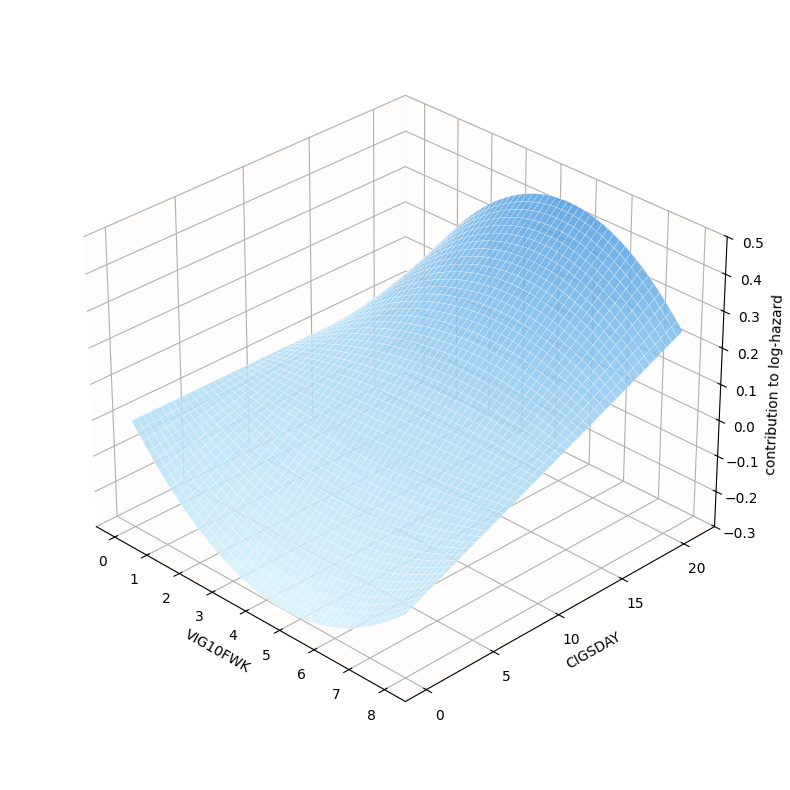

In [33]:
# define coefficient values from the fitted Cox model
beta_11 = cph.params_["CIGSDAY_VIG10FWK_11"]
beta_12 = cph.params_["CIGSDAY_VIG10FWK_12"]
beta_21 = cph.params_["CIGSDAY_VIG10FWK_21"]
beta_22 = cph.params_["CIGSDAY_VIG10FWK_22"]

# create a meshgrid for MOD10FWK and CIGSDAY values
VIG10FWK_range = np.linspace(df_train_cph3["VIG10FWK"].min(), df_train_cph3["VIG10FWK"].max(), 50)
CIGSDAY_range = np.linspace(df_train_cph3["CIGSDAY"].min(), df_train_cph3["CIGSDAY"].max(), 50)
VIG10FWK_grid, CIGSDAY_grid = np.meshgrid(VIG10FWK_range, CIGSDAY_range)

# compute spline transformations for the grid
vigf_spline_grid = dmatrix(vigf_spline_train.design_info, {"VIG10FWK": VIG10FWK_grid.ravel()}, return_type="dataframe")
cigs_spline_grid = dmatrix(cigs_spline_train.design_info, {"CIGSDAY": CIGSDAY_grid.ravel()}, return_type="dataframe")

# compute interaction terms
CIGSDAY_VIG10FWK_11_grid = vigf_spline_grid.iloc[:, 0] * cigs_spline_grid.iloc[:, 0]
CIGSDAY_VIG10FWK_12_grid = vigf_spline_grid.iloc[:, 0] * cigs_spline_grid.iloc[:, -1]
CIGSDAY_VIG10FWK_21_grid = vigf_spline_grid.iloc[:, -1] * cigs_spline_grid.iloc[:, 0]
CIGSDAY_VIG10FWK_22_grid = vigf_spline_grid.iloc[:, -1] * cigs_spline_grid.iloc[:, -1]

# compute cumulative log-hazard
log_hazard_grid = (beta_11 * CIGSDAY_VIG10FWK_11_grid + beta_12 * CIGSDAY_VIG10FWK_12_grid + 
                   beta_21 * CIGSDAY_VIG10FWK_21_grid + beta_22 * CIGSDAY_VIG10FWK_22_grid).values.reshape(50, 50)

# ---plot---
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(
    VIG10FWK_grid, CIGSDAY_grid, log_hazard_grid,
    cmap=custom_cmap_baby_blue,  
    alpha=0.85,    
    edgecolor="white", linewidth=0.2)  

ax.view_init(elev=30, azim=-45)
ax.set_xlabel("VIG10FWK")
ax.set_ylabel("CIGSDAY")
ax.set_zlabel("contribution to log-hazard")
ax.set_zlim(-0.3, 0.5) 
ax.set_facecolor("white")  

# adjust the XYZ planes color
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))  
ax.yaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))
ax.zaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))

ax.set_box_aspect(None, zoom=0.9) 
plt.tight_layout()
plt.savefig("VIG_CIG_3D_2212.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [34]:
# plot alch5(2,2)cigs(1,2)

In [35]:
# 1. copy (because this is just trial)
df_train_cph3_copy = df_train_cph3.copy()  
df_test_cph3_copy = df_test_cph3.copy()

# 2. generate splines on TRAINING data
alc5_spline_train = dmatrix("bs(ALC5UPYR, degree=2, df=2) - 1", df_train_cph3_copy, return_type='dataframe')
cigs_spline_train = dmatrix("bs(CIGSDAY, degree=1, df=2) - 1", df_train_cph3_copy, return_type='dataframe')

# 3. use the fitted splines to compute for the TEST data
alc5_spline_test = dmatrix(alc5_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')
cigs_spline_test = dmatrix(cigs_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')

# 4. sssign spline components
df_train_cph3_copy["ALC5UPYR_spline1"] = alc5_spline_train.iloc[:, 0]
df_train_cph3_copy["ALC5UPYR_spline2"] = alc5_spline_train.iloc[:, -1]
df_train_cph3_copy["CIGSDAY_spline1"] = cigs_spline_train.iloc[:, 0]
df_train_cph3_copy["CIGSDAY_spline2"] = cigs_spline_train.iloc[:, -1]

df_test_cph3_copy["ALC5UPYR_spline1"] = alc5_spline_test.iloc[:, 0]
df_test_cph3_copy["ALC5UPYR_spline2"] = alc5_spline_test.iloc[:, -1]
df_test_cph3_copy["CIGSDAY_spline1"] = cigs_spline_test.iloc[:, 0]
df_test_cph3_copy["CIGSDAY_spline2"] = cigs_spline_test.iloc[:, -1]

# 5. create interaction terms
df_train_cph3_copy["CIGSDAY_ALC5UPYR_11"] = df_train_cph3_copy["ALC5UPYR_spline1"] * df_train_cph3_copy["CIGSDAY_spline1"]
df_train_cph3_copy["CIGSDAY_ALC5UPYR_12"] = df_train_cph3_copy["ALC5UPYR_spline1"] * df_train_cph3_copy["CIGSDAY_spline2"]
df_train_cph3_copy["CIGSDAY_ALC5UPYR_21"] = df_train_cph3_copy["ALC5UPYR_spline2"] * df_train_cph3_copy["CIGSDAY_spline1"]
df_train_cph3_copy["CIGSDAY_ALC5UPYR_22"] = df_train_cph3_copy["ALC5UPYR_spline2"] * df_train_cph3_copy["CIGSDAY_spline2"]

df_test_cph3_copy["CIGSDAY_ALC5UPYR_11"] = df_test_cph3_copy["ALC5UPYR_spline1"] * df_test_cph3_copy["CIGSDAY_spline1"]
df_test_cph3_copy["CIGSDAY_ALC5UPYR_12"] = df_test_cph3_copy["ALC5UPYR_spline1"] * df_test_cph3_copy["CIGSDAY_spline2"]
df_test_cph3_copy["CIGSDAY_ALC5UPYR_21"] = df_test_cph3_copy["ALC5UPYR_spline2"] * df_test_cph3_copy["CIGSDAY_spline1"]
df_test_cph3_copy["CIGSDAY_ALC5UPYR_22"] = df_test_cph3_copy["ALC5UPYR_spline2"] * df_test_cph3_copy["CIGSDAY_spline2"]

# 6. remove columns
df_train_cph3_copy = df_train_cph3_copy.drop(columns=['ALC5UPYR_spline1', 'ALC5UPYR_spline2', 'CIGSDAY_spline1', 'CIGSDAY_spline2'])
df_test_cph3_copy = df_test_cph3_copy.drop(columns=['ALC5UPYR_spline1', 'ALC5UPYR_spline2', 'CIGSDAY_spline1', 'CIGSDAY_spline2'])

In [36]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3_copy.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY', 'ALC5UPYR']))

cph = CoxPHFitter()
cph.fit(df_train_cph3_copy, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

#cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>

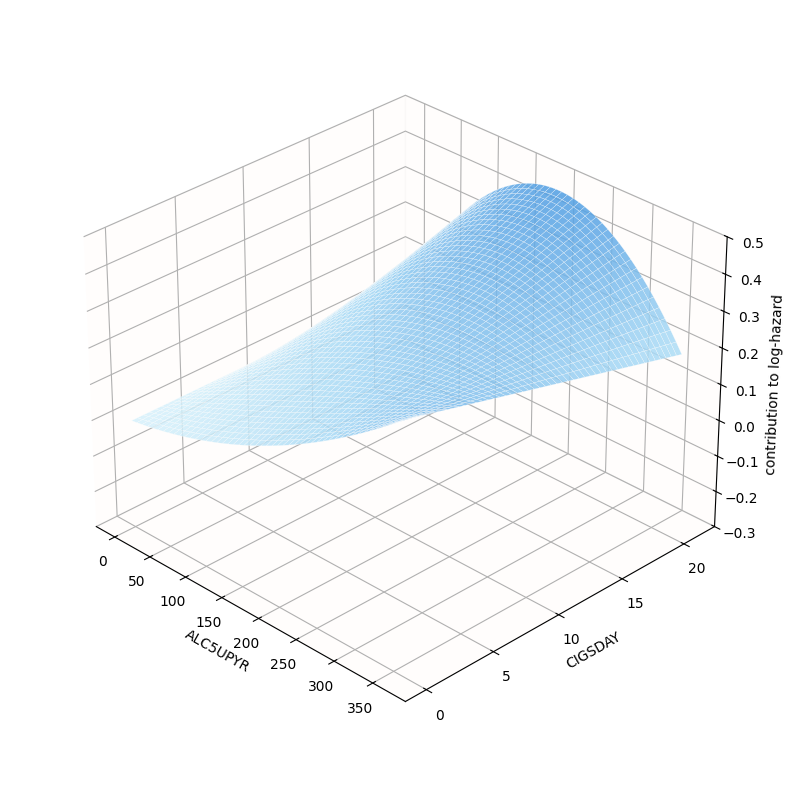

In [37]:
# define coefficient values from the fitted Cox model
beta_11 = cph.params_["CIGSDAY_ALC5UPYR_11"]
beta_12 = cph.params_["CIGSDAY_ALC5UPYR_12"]
beta_21 = cph.params_["CIGSDAY_ALC5UPYR_21"]
beta_22 = cph.params_["CIGSDAY_ALC5UPYR_22"]

# create a meshgrid for MOD10FWK and CIGSDAY values
ALC5UPYR_range = np.linspace(df_train_cph3["ALC5UPYR"].min(), df_train_cph3["ALC5UPYR"].max(), 50)
CIGSDAY_range = np.linspace(df_train_cph3["CIGSDAY"].min(), df_train_cph3["CIGSDAY"].max(), 50)
ALC5UPYR_grid, CIGSDAY_grid = np.meshgrid(ALC5UPYR_range, CIGSDAY_range)

# compute spline transformations for the grid
alc5_spline_grid = dmatrix(alc5_spline_train.design_info, {"ALC5UPYR": ALC5UPYR_grid.ravel()}, return_type="dataframe")
cigs_spline_grid = dmatrix(cigs_spline_train.design_info, {"CIGSDAY": CIGSDAY_grid.ravel()}, return_type="dataframe")

# compute interaction terms
CIGSDAY_ALC5UPYR_11_grid = alc5_spline_grid.iloc[:, 0] * cigs_spline_grid.iloc[:, 0]
CIGSDAY_ALC5UPYR_12_grid = alc5_spline_grid.iloc[:, 0] * cigs_spline_grid.iloc[:, -1]
CIGSDAY_ALC5UPYR_21_grid = alc5_spline_grid.iloc[:, -1] * cigs_spline_grid.iloc[:, 0]
CIGSDAY_ALC5UPYR_22_grid = alc5_spline_grid.iloc[:, -1] * cigs_spline_grid.iloc[:, -1]

# compute cumulative log-hazard
log_hazard_grid = (beta_11 * CIGSDAY_ALC5UPYR_11_grid + beta_12 * CIGSDAY_ALC5UPYR_12_grid + 
                   beta_21 * CIGSDAY_ALC5UPYR_21_grid + beta_22 * CIGSDAY_ALC5UPYR_22_grid).values.reshape(50, 50)

# ---plot---
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(
    ALC5UPYR_grid, CIGSDAY_grid, log_hazard_grid,
    cmap=custom_cmap_baby_blue,  
    alpha=0.85,    
    edgecolor="white", linewidth=0.2)  

ax.view_init(elev=30, azim=-45)
ax.set_xlabel("ALC5UPYR")
ax.set_ylabel("CIGSDAY")
ax.set_zlabel("contribution to log-hazard")
ax.set_zlim(-0.3, 0.5) 
ax.set_facecolor("white")  

# adjust the XYZ planes color
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))  
ax.yaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))
ax.zaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))

ax.set_box_aspect(None, zoom=0.9) 
plt.tight_layout()
plt.savefig("ALC_CIG_3D_2212.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [38]:
# Socioeconomic effects on physical health conditions

In [39]:
# intrt49
#df_train_cph3["DIABETICEV_FSRAWSCORE"] = (1-df_train_cph3["DIABETICEV"]) * (df_train_cph3["FSRAWSCORE"]) 
#df_test_cph3["DIABETICEV_FSRAWSCORE"] = (1-df_test_cph3["DIABETICEV"]) * (df_test_cph3["FSRAWSCORE"])

# intrt50
#df_train_cph3["DIABETICEV_POVERTY"] = (1-df_train_cph3["DIABETICEV"]) * (df_train_cph3["POVERTY"]) 
#df_test_cph3["DIABETICEV_POVERTY"] = (1-df_test_cph3["DIABETICEV"]) * (df_test_cph3["POVERTY"])

# intrt51
#df_train_cph3["HIPRIVATEE_CANCEREV"] = (1-df_train_cph3["HIPRIVATEE"]) * (1-df_train_cph3["CANCEREV"]) 
#df_test_cph3["HIPRIVATEE_CANCEREV"] = (1-df_test_cph3["HIPRIVATEE"]) * (1-df_test_cph3["CANCEREV"])

# intrt52
df_train_cph3["HINOTCOVE_CANCEREV"] = (1-df_train_cph3["HINOTCOVE"]) * (1-df_train_cph3["CANCEREV"]) 
df_test_cph3["HINOTCOVE_CANCEREV"] = (1-df_test_cph3["HINOTCOVE"]) * (1-df_test_cph3["CANCEREV"])

# intrt53
#df_train_cph3["POVERTY_CANCEREV"] = (1-df_train_cph3["CANCEREV"]) * (df_train_cph3["POVERTY"]) 
#df_test_cph3["POVERTY_CANCEREV"] = (1-df_test_cph3["CANCEREV"]) * (df_test_cph3["POVERTY"])

# intrt54
#df_train_cph3["HIPRIVATEE_HEARTATTEV"] = (1-df_train_cph3["HIPRIVATEE"]) * (1-df_train_cph3["HEARTATTEV"]) 
#df_test_cph3["HIPRIVATEE_HEARTATTEV"] = (1-df_test_cph3["HIPRIVATEE"]) * (1-df_test_cph3["HEARTATTEV"])

# intrt55
#df_train_cph3["POVERTY_HEARTATTEV"] = (1-df_train_cph3["HEARTATTEV"]) * (df_train_cph3["POVERTY"]) 
#df_test_cph3["POVERTY_HEARTATTEV"] = (1-df_test_cph3["HEARTATTEV"]) * (df_test_cph3["POVERTY"])

# intrt56
#df_train_cph3["HINOTCOVE_HEARTATTEV"] = (1-df_train_cph3["HINOTCOVE"]) * (1-df_train_cph3["HEARTATTEV"]) 
#df_test_cph3["HINOTCOVE_HEARTATTEV"] = (1-df_test_cph3["HINOTCOVE"]) * (1-df_test_cph3["HEARTATTEV"])

# intrt57
#df_train_cph3["HINOTCOVE_KIDNEYWKYR"] = (1-df_train_cph3["HINOTCOVE"]) * (1-df_train_cph3["KIDNEYWKYR"]) 
#df_test_cph3["HINOTCOVE_KIDNEYWKYR"] = (1-df_test_cph3["HINOTCOVE"]) * (1-df_test_cph3["KIDNEYWKYR"])

# intrt58
#df_train_cph3["HINOTCOVE_KIDNEYWKYR"] = (1-df_train_cph3["HINOTCOVE"]) * (1-df_train_cph3["HYPERTENEV"]) 
#df_test_cph3["HINOTCOVE_KIDNEYWKYR"] = (1-df_test_cph3["HINOTCOVE"]) * (1-df_test_cph3["HYPERTENEV"])

# intrt59
#df_train_cph3["HINOTCOVE_KIDNEYWKYR"] = (1-df_train_cph3["HINOTCOVE"]) * (1-df_train_cph3["STROKEV"]) 
#df_test_cph3["HINOTCOVE_KIDNEYWKYR"] = (1-df_test_cph3["HINOTCOVE"]) * (1-df_test_cph3["STROKEV"])

In [40]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>
             duration col = 'TIMETOEVENT'
                event col = 'MORTSTAT'
      baseline estimation = breslow
   number of observations = 82720
number of events observed = 4619
   partial log-likelihood = -45493.93
         time fit was run = 2025-03-10 01:43:05 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
bs(BMICALC, degree=2, df=3)[1]   -1.11      0.33      0.14           -1.38           -0.84                0.25                0.43
bs(BMICALC, degree=2, df=3)[2]   -1.35      0.26      0.11           -1.56           -1.14                0.21                0.32
bs(BMICALC, degree=2, df=3)[3]   -0.69      0.50      0.21           -1.11           -0.27                0.33                0.76
bs(HRSLEEP, degree=1, df=2)[1]   -0.31      0.73      0.10           -0.50           -0.12                0.61                0.89
bs(HRSLEEP, degree=1, df=2)[2]    0.69      1.99      0.11            0.48            0.89                1.62                2.44
bs(STRONGFWK, degree=2, df=2)[1] -0.39      0.67      0.15           -0.68           -0.11                0.51                0.90
bs(STRONGFWK, degree=2, df=2)[2] -0.32      0.73      0.15           -0.62           -0.02                0.54                0.98
bs(ALCDAYSYR, degree=1, df=2)[1] -0.22      0.80      0.08           -0.37           -0.07                0.69                0.93
bs(ALCDAYSYR, degree=1, df=2)[2] -0.34      0.71      0.08           -0.51           -0.18                0.60                0.84
bs(ALCAMT, degree=2, df=2)[1]     0.62      1.86      0.21            0.20            1.04                1.23                2.83
bs(ALCAMT, degree=2, df=2)[2]     0.25      1.29      0.14           -0.03            0.54                0.97                1.71
bs(POVERTY, degree=2, df=2)[1]   -0.04      0.96      0.09           -0.21            0.14                0.81                1.15
bs(POVERTY, degree=2, df=2)[2]   -0.42      0.66      0.06           -0.54           -0.31                0.58                0.73
AEFFORT                           0.07      1.08      0.02            0.03            0.11                1.04                1.12
AFEELINT1MO                      -0.05      0.96      0.02           -0.08           -0.01                0.92                0.99
AGE                               0.07      1.08      0.00            0.07            0.08                1.07                1.08
AGE_CANCEREV                      0.01      1.01      0.00            0.01            0.02                1.01                1.02
AGE_KIDNEYWKYR                    0.02      1.02      0.00            0.01            0.02                1.01                1.02
ALC5UPYR                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ALCSTAT1_2                        0.01      1.01      0.04           -0.07            0.10                0.93                1.10
ALCSTAT1_3                       -0.19      0.83      0.09           -0.37           -0.02                0.69                0.98
ARTHGLUPEV                       -0.03      0.97      0.03           -0.09            0.03                0.91                1.03
AWORTHLESS                        0.01      1.01      0.02           -0.03            0.05                0.97                1.06
BLIND                             0.59      1.80      0.11            0.37            0.80                1.45                2.22
CANCEREV                          1.62      5.07      0.24            1.16            2.09                3.19                8.05
CANCEREV_HYPERTENEV              -0.29      0.75      0.07           -0.43           -0

In [41]:
print(f'APLL_is: {cph.score(df_train_cph3, scoring_method="log_likelihood"):.4f}')
print(f'APLL_os: {cph.score(df_test_cph3, scoring_method="log_likelihood"):.4f}')
print(f'C_is: {cph.score(df_train_cph3, scoring_method="concordance_index"):.4f}')
print(f'C_os: {cph.score(df_test_cph3, scoring_method="concordance_index"):.4f}')

APLL_is: -0.5500
APLL_os: -0.4599
C_is: 0.8863
C_os: 0.8908


In [42]:
# predict the survival function for each individual
survival_probs_16_train = cph.predict_survival_function(df_train_cph3)
survival_probs_16_test = cph.predict_survival_function(df_test_cph3)

# extract 3y survival probabilities
survival_prob_3y_train = survival_probs_16_train.iloc[3] 
survival_prob_3y_test = survival_probs_16_test.iloc[3] 

# get 3-year event status based on TIMETOEVENT and MORTSTAT
status_3y_train = np.where((df_train_cph3["MORTSTAT"] == 1) & (df_train_cph3["TIMETOEVENT"] <= 3), 0, 1)
status_3y_test = np.where((df_test_cph3["MORTSTAT"] == 1) & (df_test_cph3["TIMETOEVENT"] <= 3), 0, 1)

print(f'log-loss is: {log_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'log-loss os: {log_loss(status_3y_test, survival_prob_3y_test):.4f}')
print(f'BS is: {brier_score_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'BS os: {brier_score_loss(status_3y_test, survival_prob_3y_test):.4f}')

log-loss is: 0.1118
log-loss os: 0.1095
BS is: 0.0294
BS os: 0.0292


In [43]:
# Gender related effects

In [44]:
# intrt59
df_train_cph3["FEMALE_MARST30"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["MARST_30"]) 
df_test_cph3["FEMALE_MARST30"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["MARST_30"])

# intrt60
#df_train_cph3["FEMALE_MARST50"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["MARST_50"]) 
#df_test_cph3["FEMALE_MARST50"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["MARST_50"])

# intrt61
df_train_cph3["FEMALE_MARST10"] = (df_train_cph3["SEX"]-1) * (1-df_train_cph3["MARST_20"]- df_train_cph3["MARST_30"]-df_train_cph3["MARST_40"]-df_train_cph3["MARST_50"]) 
df_test_cph3["FEMALE_MARST10"] = (df_test_cph3["SEX"]-1) * (1-df_test_cph3["MARST_20"]-df_test_cph3["MARST_30"]-df_test_cph3["MARST_40"]-df_test_cph3["MARST_50"])

# intrt62
#df_train_cph3["FEMALE_MARST20"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["MARST_20"]) 
#df_test_cph3["FEMALE_MARST20"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["MARST_20"])

# intrt63
#df_train_cph3["FEMALE_HEARTATTEV"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["HEARTATTEV"]-1) 
#df_test_cph3["FEMALE_HEARTATTEV"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["HEARTATTEV"]-1)

# intrt64
#df_train_cph3["FEMALE_DIABETICEV"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["DIABETICEV"]-1) 
#df_test_cph3["FEMALE_DIABETICEV"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["DIABETICEV"]-1)

# intrt65
df_train_cph3["FEMALE_HYPERTENEV"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["HYPERTENEV"]-1) 
df_test_cph3["FEMALE_HYPERTENEV"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["HYPERTENEV"]-1)

# intrt66
#df_train_cph3["FEMALE_CHEARTDIEV"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["CHEARTDIEV"]-1) 
#df_test_cph3["FEMALE_CHEARTDIEV"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["CHEARTDIEV"]-1)

# intrt67
#df_train_cph3["FEMALE_AEFFORT"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["AEFFORT"]) 
#df_test_cph3["FEMALE_AEFFORT"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["AEFFORT"])

# intrt68
#df_train_cph3["FEMALE_AWORTHLESS"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["AWORTHLESS"]) 
#df_test_cph3["FEMALE_AWORTHLESS"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["AWORTHLESS"])

In [45]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>
             duration col = 'TIMETOEVENT'
                event col = 'MORTSTAT'
      baseline estimation = breslow
   number of observations = 82720
number of events observed = 4619
   partial log-likelihood = -45485.23
         time fit was run = 2025-03-10 01:43:11 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
bs(BMICALC, degree=2, df=3)[1]   -1.14      0.32      0.14           -1.41           -0.87                0.24                0.42
bs(BMICALC, degree=2, df=3)[2]   -1.36      0.26      0.11           -1.57           -1.15                0.21                0.32
bs(BMICALC, degree=2, df=3)[3]   -0.73      0.48      0.21           -1.14           -0.31                0.32                0.73
bs(HRSLEEP, degree=1, df=2)[1]   -0.31      0.73      0.10           -0.50           -0.12                0.60                0.89
bs(HRSLEEP, degree=1, df=2)[2]    0.69      1.99      0.11            0.48            0.90                1.62                2.45
bs(STRONGFWK, degree=2, df=2)[1] -0.39      0.68      0.15           -0.68           -0.11                0.51                0.90
bs(STRONGFWK, degree=2, df=2)[2] -0.33      0.72      0.15           -0.63           -0.03                0.53                0.97
bs(ALCDAYSYR, degree=1, df=2)[1] -0.22      0.80      0.08           -0.37           -0.07                0.69                0.93
bs(ALCDAYSYR, degree=1, df=2)[2] -0.35      0.71      0.08           -0.51           -0.18                0.60                0.83
bs(ALCAMT, degree=2, df=2)[1]     0.63      1.89      0.21            0.22            1.05                1.24                2.87
bs(ALCAMT, degree=2, df=2)[2]     0.24      1.27      0.15           -0.04            0.52                0.96                1.69
bs(POVERTY, degree=2, df=2)[1]   -0.05      0.95      0.09           -0.22            0.13                0.80                1.14
bs(POVERTY, degree=2, df=2)[2]   -0.43      0.65      0.06           -0.55           -0.32                0.58                0.73
AEFFORT                           0.07      1.07      0.02            0.03            0.11                1.03                1.12
AFEELINT1MO                      -0.04      0.96      0.02           -0.08           -0.01                0.92                0.99
AGE                               0.07      1.08      0.00            0.07            0.08                1.07                1.08
AGE_CANCEREV                      0.01      1.02      0.00            0.01            0.02                1.01                1.02
AGE_KIDNEYWKYR                    0.02      1.02      0.00            0.01            0.02                1.01                1.02
ALC5UPYR                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ALCSTAT1_2                        0.02      1.02      0.04           -0.07            0.10                0.93                1.11
ALCSTAT1_3                       -0.19      0.83      0.09           -0.37           -0.01                0.69                0.99
ARTHGLUPEV                       -0.03      0.97      0.03           -0.09            0.03                0.91                1.03
AWORTHLESS                        0.01      1.01      0.02           -0.03            0.05                0.97                1.06
BLIND                             0.57      1.77      0.11            0.36            0.78                1.43                2.19
CANCEREV                          1.64      5.14      0.24            1.17            2.10                3.23                8.16
CANCEREV_HYPERTENEV              -0.28      0.76      0.07           -0.42           -0

In [46]:
print(f'APLL_is: {cph.score(df_train_cph3, scoring_method="log_likelihood"):.4f}')
print(f'APLL_os: {cph.score(df_test_cph3, scoring_method="log_likelihood"):.4f}')
print(f'C_is: {cph.score(df_train_cph3, scoring_method="concordance_index"):.4f}')
print(f'C_os: {cph.score(df_test_cph3, scoring_method="concordance_index"):.4f}')

APLL_is: -0.5499
APLL_os: -0.4600
C_is: 0.8865
C_os: 0.8909


In [47]:
# predict the survival function for each individual
survival_probs_16_train = cph.predict_survival_function(df_train_cph3)
survival_probs_16_test = cph.predict_survival_function(df_test_cph3)

# extract 3y survival probabilities
survival_prob_3y_train = survival_probs_16_train.iloc[3] 
survival_prob_3y_test = survival_probs_16_test.iloc[3] 

# get 3-year event status based on TIMETOEVENT and MORTSTAT
status_3y_train = np.where((df_train_cph3["MORTSTAT"] == 1) & (df_train_cph3["TIMETOEVENT"] <= 3), 0, 1)
status_3y_test = np.where((df_test_cph3["MORTSTAT"] == 1) & (df_test_cph3["TIMETOEVENT"] <= 3), 0, 1)

print(f'log-loss is: {log_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'log-loss os: {log_loss(status_3y_test, survival_prob_3y_test):.4f}')
print(f'BS is: {brier_score_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'BS os: {brier_score_loss(status_3y_test, survival_prob_3y_test):.4f}')

log-loss is: 0.1117
log-loss os: 0.1095
BS is: 0.0294
BS os: 0.0292


In [48]:
# BMI related effects

In [49]:
# intrt69
#df_train_cph3["BMICALC_SEX"] = (df_train_cph3["SEX"]-1) * (df_train_cph3["BMICALC"]) 
#df_test_cph3["BMICALC_SEX"] = (df_test_cph3["SEX"]-1) * (df_test_cph3["BMICALC"])

# intrt70
#df_train_cph3["BMICALC_DIABETICEV"] = (df_train_cph3["DIABETICEV"]-1) * (df_train_cph3["BMICALC"]) 
#df_test_cph3["BMICALC_DIABETICEV"] = (df_test_cph3["DIABETICEV"]-1) * (df_test_cph3["BMICALC"])

# intrt71
#df_train_cph3["BMICALC_HEARTATTEV"] = (df_train_cph3["HEARTATTEV"]-1) * (df_train_cph3["BMICALC"]) 
#df_test_cph3["BMICALC_HEARTATTEV"] = (df_test_cph3["HEARTATTEV"]-1) * (df_test_cph3["BMICALC"])

# intrt72
#df_train_cph3["BMICALC_HYPERTENEV"] = (df_train_cph3["HYPERTENEV"]-1) * (df_train_cph3["BMICALC"]) 
#df_test_cph3["BMICALC_HYPERTENEV"] = (df_test_cph3["HYPERTENEV"]-1) * (df_test_cph3["BMICALC"])

# intrt73
#df_train_cph3["BMICALC_STROKEV"] = (df_train_cph3["STROKEV"]-1) * (df_train_cph3["BMICALC"]) 
#df_test_cph3["BMICALC_STROKEV"] = (df_test_cph3["STROKEV"]-1) * (df_test_cph3["BMICALC"])

# intrt74
#df_train_cph3["BMICALC_MOD10FWK"] = (df_train_cph3["MOD10FWK"]) * (df_train_cph3["BMICALC"]) 
#df_test_cph3["BMICALC_MOD10FWK"] = (df_test_cph3["MOD10FWK"]) * (df_test_cph3["BMICALC"])

# intrt75
#df_train_cph3["BMICALC_VIG10FWK"] = (df_train_cph3["VIG10FWK"]) * (df_train_cph3["BMICALC"]) 
#df_test_cph3["BMICALC_VIG10FWK"] = (df_test_cph3["VIG10FWK"]) * (df_test_cph3["BMICALC"])

# intrt76
#df_train_cph3["BMICALC_STRONGFWK"] = (df_train_cph3["STRONGFWK"]) * (df_train_cph3["BMICALC"]) 
#df_test_cph3["BMICALC_STRONGFWK"] = (df_test_cph3["STRONGFWK"]) * (df_test_cph3["BMICALC"])

In [50]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>
             duration col = 'TIMETOEVENT'
                event col = 'MORTSTAT'
      baseline estimation = breslow
   number of observations = 82720
number of events observed = 4619
   partial log-likelihood = -45485.23
         time fit was run = 2025-03-10 01:43:17 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
bs(BMICALC, degree=2, df=3)[1]   -1.14      0.32      0.14           -1.41           -0.87                0.24                0.42
bs(BMICALC, degree=2, df=3)[2]   -1.36      0.26      0.11           -1.57           -1.15                0.21                0.32
bs(BMICALC, degree=2, df=3)[3]   -0.73      0.48      0.21           -1.14           -0.31                0.32                0.73
bs(HRSLEEP, degree=1, df=2)[1]   -0.31      0.73      0.10           -0.50           -0.12                0.60                0.89
bs(HRSLEEP, degree=1, df=2)[2]    0.69      1.99      0.11            0.48            0.90                1.62                2.45
bs(STRONGFWK, degree=2, df=2)[1] -0.39      0.68      0.15           -0.68           -0.11                0.51                0.90
bs(STRONGFWK, degree=2, df=2)[2] -0.33      0.72      0.15           -0.63           -0.03                0.53                0.97
bs(ALCDAYSYR, degree=1, df=2)[1] -0.22      0.80      0.08           -0.37           -0.07                0.69                0.93
bs(ALCDAYSYR, degree=1, df=2)[2] -0.35      0.71      0.08           -0.51           -0.18                0.60                0.83
bs(ALCAMT, degree=2, df=2)[1]     0.63      1.89      0.21            0.22            1.05                1.24                2.87
bs(ALCAMT, degree=2, df=2)[2]     0.24      1.27      0.15           -0.04            0.52                0.96                1.69
bs(POVERTY, degree=2, df=2)[1]   -0.05      0.95      0.09           -0.22            0.13                0.80                1.14
bs(POVERTY, degree=2, df=2)[2]   -0.43      0.65      0.06           -0.55           -0.32                0.58                0.73
AEFFORT                           0.07      1.07      0.02            0.03            0.11                1.03                1.12
AFEELINT1MO                      -0.04      0.96      0.02           -0.08           -0.01                0.92                0.99
AGE                               0.07      1.08      0.00            0.07            0.08                1.07                1.08
AGE_CANCEREV                      0.01      1.02      0.00            0.01            0.02                1.01                1.02
AGE_KIDNEYWKYR                    0.02      1.02      0.00            0.01            0.02                1.01                1.02
ALC5UPYR                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ALCSTAT1_2                        0.02      1.02      0.04           -0.07            0.10                0.93                1.11
ALCSTAT1_3                       -0.19      0.83      0.09           -0.37           -0.01                0.69                0.99
ARTHGLUPEV                       -0.03      0.97      0.03           -0.09            0.03                0.91                1.03
AWORTHLESS                        0.01      1.01      0.02           -0.03            0.05                0.97                1.06
BLIND                             0.57      1.77      0.11            0.36            0.78                1.43                2.19
CANCEREV                          1.64      5.14      0.24            1.17            2.10                3.23                8.16
CANCEREV_HYPERTENEV              -0.28      0.76      0.07           -0.42           -0

In [51]:
print(f'APLL_is: {cph.score(df_train_cph3, scoring_method="log_likelihood"):.4f}')
print(f'APLL_os: {cph.score(df_test_cph3, scoring_method="log_likelihood"):.4f}')
print(f'C_is: {cph.score(df_train_cph3, scoring_method="concordance_index"):.4f}')
print(f'C_os: {cph.score(df_test_cph3, scoring_method="concordance_index"):.4f}')

APLL_is: -0.5499
APLL_os: -0.4600
C_is: 0.8865
C_os: 0.8909


In [52]:
# predict the survival function for each individual
survival_probs_16_train = cph.predict_survival_function(df_train_cph3)
survival_probs_16_test = cph.predict_survival_function(df_test_cph3)

# extract 3y survival probabilities
survival_prob_3y_train = survival_probs_16_train.iloc[3] 
survival_prob_3y_test = survival_probs_16_test.iloc[3] 

# get 3-year event status based on TIMETOEVENT and MORTSTAT
status_3y_train = np.where((df_train_cph3["MORTSTAT"] == 1) & (df_train_cph3["TIMETOEVENT"] <= 3), 0, 1)
status_3y_test = np.where((df_test_cph3["MORTSTAT"] == 1) & (df_test_cph3["TIMETOEVENT"] <= 3), 0, 1)

print(f'log-loss is: {log_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'log-loss os: {log_loss(status_3y_test, survival_prob_3y_test):.4f}')
print(f'BS is: {brier_score_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'BS os: {brier_score_loss(status_3y_test, survival_prob_3y_test):.4f}')

log-loss is: 0.1117
log-loss os: 0.1095
BS is: 0.0294
BS os: 0.0292


In [53]:
# plot mf(2,2)bmi(2,2)

In [54]:
# 1. copy (because this is just trial)
df_train_cph3_copy = df_train_cph3.copy()  
df_test_cph3_copy = df_test_cph3.copy()

# 2. generate splines on TRAINING data
mf_spline_train = dmatrix("bs(MOD10FWK, degree=2, df=2) - 1", df_train_cph3_copy, return_type='dataframe')
bmi_spline_train = dmatrix("bs(BMICALC, degree=1, df=2) - 1", df_train_cph3_copy, return_type='dataframe')

# 3. use the fitted splines to compute for the TEST data
mf_spline_test = dmatrix(mf_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')
bmi_spline_test = dmatrix(bmi_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')

# 4. sssign spline components
df_train_cph3_copy["MOD10FWK_spline1"] = mf_spline_train.iloc[:, 0]
df_train_cph3_copy["MOD10FWK_spline2"] = mf_spline_train.iloc[:, -1]
df_train_cph3_copy["BMI_spline1"] = bmi_spline_train.iloc[:, 0]
df_train_cph3_copy["BMI_spline2"] = bmi_spline_train.iloc[:, -1]

df_test_cph3_copy["MOD10FWK_spline1"] = mf_spline_test.iloc[:, 0]
df_test_cph3_copy["MOD10FWK_spline2"] = mf_spline_test.iloc[:, -1]
df_test_cph3_copy["BMI_spline1"] = bmi_spline_test.iloc[:, 0]
df_test_cph3_copy["BMI_spline2"] = bmi_spline_test.iloc[:, -1]

# 5. create interaction terms
df_train_cph3_copy["MF_BMI_11"] = df_train_cph3_copy["MOD10FWK_spline1"] * df_train_cph3_copy["BMI_spline1"]
df_train_cph3_copy["MF_BMI_12"] = df_train_cph3_copy["MOD10FWK_spline1"] * df_train_cph3_copy["BMI_spline2"]
df_train_cph3_copy["MF_BMI_21"] = df_train_cph3_copy["MOD10FWK_spline2"] * df_train_cph3_copy["BMI_spline1"]
df_train_cph3_copy["MF_BMI_22"] = df_train_cph3_copy["MOD10FWK_spline2"] * df_train_cph3_copy["BMI_spline2"]

df_test_cph3_copy["MF_BMI_11"] = df_test_cph3_copy["MOD10FWK_spline1"] * df_test_cph3_copy["BMI_spline1"]
df_test_cph3_copy["MF_BMI_12"] = df_test_cph3_copy["MOD10FWK_spline1"] * df_test_cph3_copy["BMI_spline2"]
df_test_cph3_copy["MF_BMI_21"] = df_test_cph3_copy["MOD10FWK_spline2"] * df_test_cph3_copy["BMI_spline1"]
df_test_cph3_copy["MF_BMI_22"] = df_test_cph3_copy["MOD10FWK_spline2"] * df_test_cph3_copy["BMI_spline2"]

# 6. remove columns
df_train_cph3_copy = df_train_cph3_copy.drop(columns=['MOD10FWK_spline1', 'MOD10FWK_spline2', 'BMI_spline1', 'BMI_spline2'])
df_test_cph3_copy = df_test_cph3_copy.drop(columns=['MOD10FWK_spline1', 'MOD10FWK_spline2', 'BMI_spline1', 'BMI_spline2'])

In [55]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3_copy.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3_copy, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

#cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>

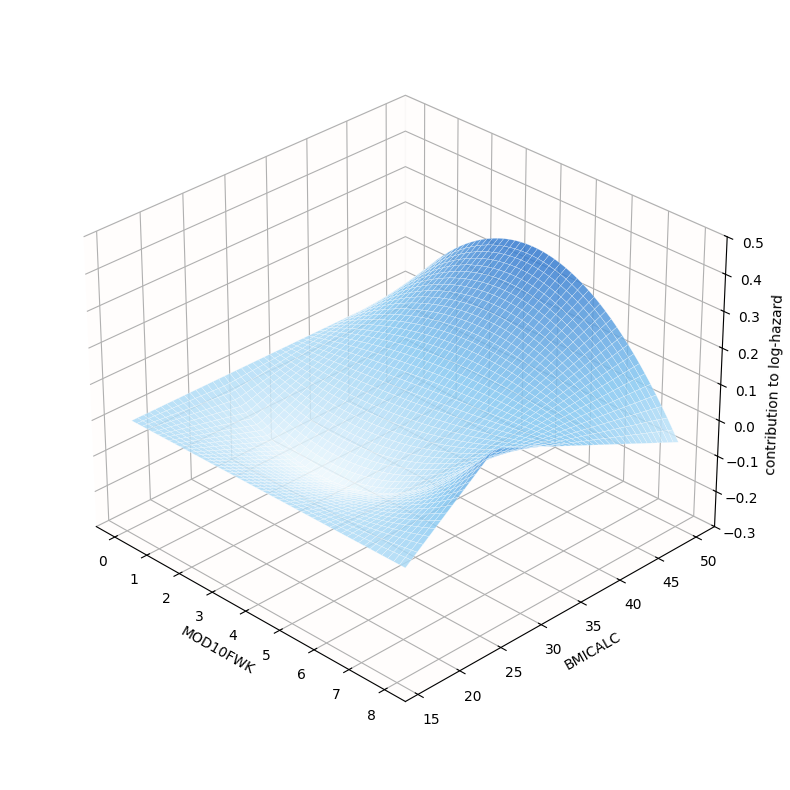

In [56]:
# define coefficient values from the fitted Cox model
beta_11 = cph.params_["MF_BMI_11"]
beta_12 = cph.params_["MF_BMI_12"]
beta_21 = cph.params_["MF_BMI_21"]
beta_22 = cph.params_["MF_BMI_22"]

# create a meshgrid for MOD10FWK and CIGSDAY values
MF_range = np.linspace(df_train_cph3_copy["MOD10FWK"].min(), df_train_cph3_copy["MOD10FWK"].max(), 50)
BMI_range = np.linspace(df_train_cph3_copy["BMICALC"].min(), df_train_cph3_copy["BMICALC"].max(), 50)
MF_grid, BMI_grid = np.meshgrid(MF_range, BMI_range)

# compute spline transformations for the grid
mf_spline_grid = dmatrix(mf_spline_train.design_info, {"MOD10FWK": MOD10FWK_grid.ravel()}, return_type="dataframe")
bmi_spline_grid = dmatrix(bmi_spline_train.design_info, {"BMICALC": BMI_grid.ravel()}, return_type="dataframe")

# compute interaction terms
MF_BMI_11_grid = mf_spline_grid.iloc[:, 0] *bmi_spline_grid.iloc[:, 0]
MF_BMI_12_grid = mf_spline_grid.iloc[:, 0] * bmi_spline_grid.iloc[:, -1]
MF_BMI_21_grid = mf_spline_grid.iloc[:, -1] * bmi_spline_grid.iloc[:, 0]
MF_BMI_22_grid = mf_spline_grid.iloc[:, -1] * bmi_spline_grid.iloc[:, -1]

# compute cumulative log-hazard
log_hazard_grid = (beta_11 * MF_BMI_11_grid + beta_12 * MF_BMI_12_grid + 
                   beta_21 * MF_BMI_21_grid + beta_22 * MF_BMI_22_grid).values.reshape(50, 50)

# ---plot---
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

# define c map
colors_baby_blue = ["#EBF8FE", "#85C8F2", "#347ACF"]
custom_cmap_baby_blue = LinearSegmentedColormap.from_list("BabyBlueCmap", colors_baby_blue)

ax.plot_surface(
    MF_grid, BMI_grid, log_hazard_grid,
    cmap=custom_cmap_baby_blue,  
    alpha=0.85,    
    edgecolor="white", linewidth=0.2)  

ax.view_init(elev=30, azim=-45)
ax.set_xlabel("MOD10FWK")
ax.set_ylabel("BMICALC")
ax.set_zlabel("contribution to log-hazard")
ax.set_zlim(-0.3, 0.5) 
ax.set_facecolor("white")  

# adjust the XYZ planes color
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))  
ax.yaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))
ax.zaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))

ax.set_box_aspect(None, zoom=0.9) 
plt.tight_layout()
plt.savefig("MOD_BMI_3D_2222.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [57]:
# plot vf(2,2)bmi(2,2)

In [58]:
# 1. copy (because this is just trial)
df_train_cph3_copy = df_train_cph3.copy()  
df_test_cph3_copy = df_test_cph3.copy()

# 2. generate splines on TRAINING data
vf_spline_train = dmatrix("bs(VIG10FWK, degree=2, df=2) - 1", df_train_cph3_copy, return_type='dataframe')
bmi_spline_train = dmatrix("bs(BMICALC, degree=1, df=2) - 1", df_train_cph3_copy, return_type='dataframe')

# 3. use the fitted splines to compute for the TEST data
vf_spline_test = dmatrix(vf_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')
bmi_spline_test = dmatrix(bmi_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')

# 4. sssign spline components
df_train_cph3_copy["VIG10FWK_spline1"] = vf_spline_train.iloc[:, 0]
df_train_cph3_copy["VIG10FWK_spline2"] = vf_spline_train.iloc[:, -1]
df_train_cph3_copy["BMI_spline1"] = bmi_spline_train.iloc[:, 0]
df_train_cph3_copy["BMI_spline2"] = bmi_spline_train.iloc[:, -1]

df_test_cph3_copy["VIG10FWK_spline1"] = vf_spline_test.iloc[:, 0]
df_test_cph3_copy["VIG10FWK_spline2"] = vf_spline_test.iloc[:, -1]
df_test_cph3_copy["BMI_spline1"] = bmi_spline_test.iloc[:, 0]
df_test_cph3_copy["BMI_spline2"] = bmi_spline_test.iloc[:, -1]

# 5. create interaction terms
df_train_cph3_copy["VF_BMI_11"] = df_train_cph3_copy["VIG10FWK_spline1"] * df_train_cph3_copy["BMI_spline1"]
df_train_cph3_copy["VF_BMI_12"] = df_train_cph3_copy["VIG10FWK_spline1"] * df_train_cph3_copy["BMI_spline2"]
df_train_cph3_copy["VF_BMI_21"] = df_train_cph3_copy["VIG10FWK_spline2"] * df_train_cph3_copy["BMI_spline1"]
df_train_cph3_copy["VF_BMI_22"] = df_train_cph3_copy["VIG10FWK_spline2"] * df_train_cph3_copy["BMI_spline2"]

df_test_cph3_copy["VF_BMI_11"] = df_test_cph3_copy["VIG10FWK_spline1"] * df_test_cph3_copy["BMI_spline1"]
df_test_cph3_copy["VF_BMI_12"] = df_test_cph3_copy["VIG10FWK_spline1"] * df_test_cph3_copy["BMI_spline2"]
df_test_cph3_copy["VF_BMI_21"] = df_test_cph3_copy["VIG10FWK_spline2"] * df_test_cph3_copy["BMI_spline1"]
df_test_cph3_copy["VF_BMI_22"] = df_test_cph3_copy["VIG10FWK_spline2"] * df_test_cph3_copy["BMI_spline2"]

# 6. remove columns
df_train_cph3_copy = df_train_cph3_copy.drop(columns=['VIG10FWK_spline1', 'VIG10FWK_spline2', 'BMI_spline1', 'BMI_spline2'])
df_test_cph3_copy = df_test_cph3_copy.drop(columns=['VIG10FWK_spline1', 'VIG10FWK_spline2', 'BMI_spline1', 'BMI_spline2'])

In [59]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3_copy.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3_copy, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

#cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>

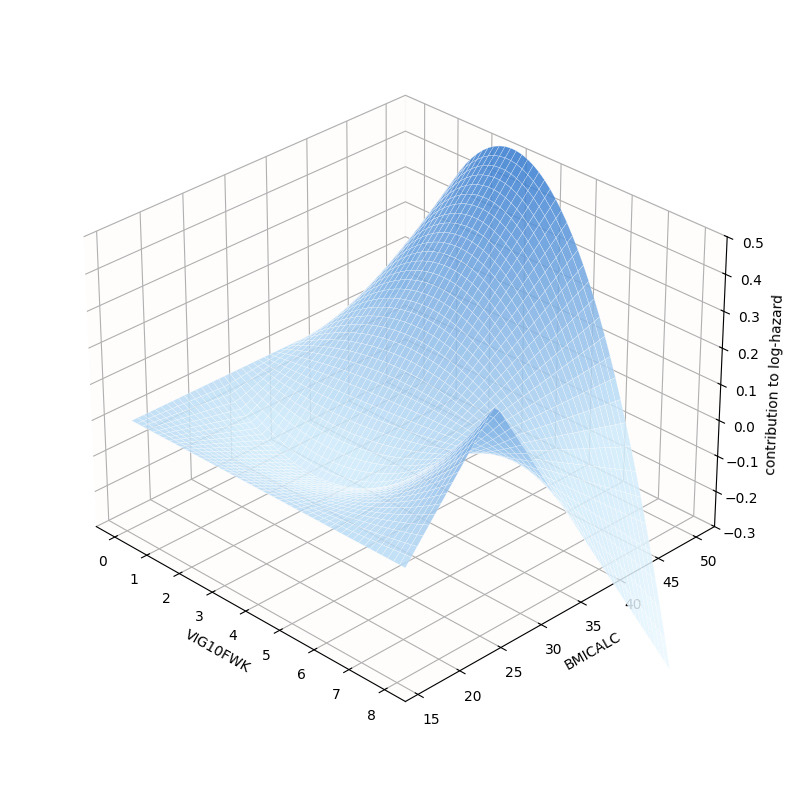

In [60]:
# define coefficient values from the fitted Cox model
beta_11 = cph.params_["VF_BMI_11"]
beta_12 = cph.params_["VF_BMI_12"]
beta_21 = cph.params_["VF_BMI_21"]
beta_22 = cph.params_["VF_BMI_22"]

# create a meshgrid for MOD10FWK and CIGSDAY values
VF_range = np.linspace(df_train_cph3_copy["VIG10FWK"].min(), df_train_cph3_copy["VIG10FWK"].max(), 50)
BMI_range = np.linspace(df_train_cph3_copy["BMICALC"].min(), df_train_cph3_copy["BMICALC"].max(), 50)
VF_grid, BMI_grid = np.meshgrid(VF_range, BMI_range)

# compute spline transformations for the grid
vf_spline_grid = dmatrix(vf_spline_train.design_info, {"VIG10FWK": VIG10FWK_grid.ravel()}, return_type="dataframe")
bmi_spline_grid = dmatrix(bmi_spline_train.design_info, {"BMICALC": BMI_grid.ravel()}, return_type="dataframe")

# compute interaction terms
VF_BMI_11_grid = vf_spline_grid.iloc[:, 0] *bmi_spline_grid.iloc[:, 0]
VF_BMI_12_grid = vf_spline_grid.iloc[:, 0] * bmi_spline_grid.iloc[:, -1]
VF_BMI_21_grid = vf_spline_grid.iloc[:, -1] * bmi_spline_grid.iloc[:, 0]
VF_BMI_22_grid = vf_spline_grid.iloc[:, -1] * bmi_spline_grid.iloc[:, -1]

# compute cumulative log-hazard
log_hazard_grid = (beta_11 * VF_BMI_11_grid + beta_12 * VF_BMI_12_grid + 
                   beta_21 * VF_BMI_21_grid + beta_22 * VF_BMI_22_grid).values.reshape(50, 50)

# ---plot---
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

colors_baby_blue = ["#EBF8FE", "#CDEAFB","#347ACF"]
custom_cmap_baby_blue = LinearSegmentedColormap.from_list("BabyBlueCmap", colors_baby_blue)


ax.plot_surface(
    MF_grid, BMI_grid, log_hazard_grid,
    cmap=custom_cmap_baby_blue,  
    alpha=0.85,    
    edgecolor="white", linewidth=0.2)  

ax.view_init(elev=30, azim=-45)
ax.set_xlabel("VIG10FWK")
ax.set_ylabel("BMICALC")
ax.set_zlabel("contribution to log-hazard")
ax.set_zlim(-0.3, 0.5) 
ax.set_facecolor("white")  

# adjust the XYZ planes color
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))  
ax.yaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))
ax.zaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))

ax.set_box_aspect(None, zoom=0.9) 
plt.tight_layout()
plt.savefig("VIG_BMI_3D_2222.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [61]:
# plot sf(2,2)bmi(2,2)

In [62]:
# 1. copy (because this is just trial)
df_train_cph3_copy = df_train_cph3.copy()  
df_test_cph3_copy = df_test_cph3.copy()

# 2. generate splines on TRAINING data
sf_spline_train = dmatrix("bs(STRONGFWK, degree=2, df=2) - 1", df_train_cph3_copy, return_type='dataframe')
bmi_spline_train = dmatrix("bs(BMICALC, degree=1, df=2) - 1", df_train_cph3_copy, return_type='dataframe')

# 3. use the fitted splines to compute for the TEST data
sf_spline_test = dmatrix(sf_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')
bmi_spline_test = dmatrix(bmi_spline_train.design_info, df_test_cph3_copy, return_type='dataframe')

# 4. sssign spline components
df_train_cph3_copy["STRONGFWK_spline1"] = sf_spline_train.iloc[:, 0]
df_train_cph3_copy["STRONGFWK_spline2"] = sf_spline_train.iloc[:, -1]
df_train_cph3_copy["BMI_spline1"] = bmi_spline_train.iloc[:, 0]
df_train_cph3_copy["BMI_spline2"] = bmi_spline_train.iloc[:, -1]

df_test_cph3_copy["STRONGFWK_spline1"] = sf_spline_test.iloc[:, 0]
df_test_cph3_copy["STRONGFWK_spline2"] = sf_spline_test.iloc[:, -1]
df_test_cph3_copy["BMI_spline1"] = bmi_spline_test.iloc[:, 0]
df_test_cph3_copy["BMI_spline2"] = bmi_spline_test.iloc[:, -1]

# 5. create interaction terms
df_train_cph3_copy["SF_BMI_11"] = df_train_cph3_copy["STRONGFWK_spline1"] * df_train_cph3_copy["BMI_spline1"]
df_train_cph3_copy["SF_BMI_12"] = df_train_cph3_copy["STRONGFWK_spline1"] * df_train_cph3_copy["BMI_spline2"]
df_train_cph3_copy["SF_BMI_21"] = df_train_cph3_copy["STRONGFWK_spline2"] * df_train_cph3_copy["BMI_spline1"]
df_train_cph3_copy["SF_BMI_22"] = df_train_cph3_copy["STRONGFWK_spline2"] * df_train_cph3_copy["BMI_spline2"]

df_test_cph3_copy["SF_BMI_11"] = df_test_cph3_copy["STRONGFWK_spline1"] * df_test_cph3_copy["BMI_spline1"]
df_test_cph3_copy["SF_BMI_12"] = df_test_cph3_copy["STRONGFWK_spline1"] * df_test_cph3_copy["BMI_spline2"]
df_test_cph3_copy["SF_BMI_21"] = df_test_cph3_copy["STRONGFWK_spline2"] * df_test_cph3_copy["BMI_spline1"]
df_test_cph3_copy["SF_BMI_22"] = df_test_cph3_copy["STRONGFWK_spline2"] * df_test_cph3_copy["BMI_spline2"]

# 6. remove columns
df_train_cph3_copy = df_train_cph3_copy.drop(columns=['STRONGFWK_spline1', 'STRONGFWK_spline2', 'BMI_spline1', 'BMI_spline2'])
df_test_cph3_copy = df_test_cph3_copy.drop(columns=['STRONGFWK_spline1', 'STRONGFWK_spline2', 'BMI_spline1', 'BMI_spline2'])

In [63]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3_copy.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3_copy, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

#cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>

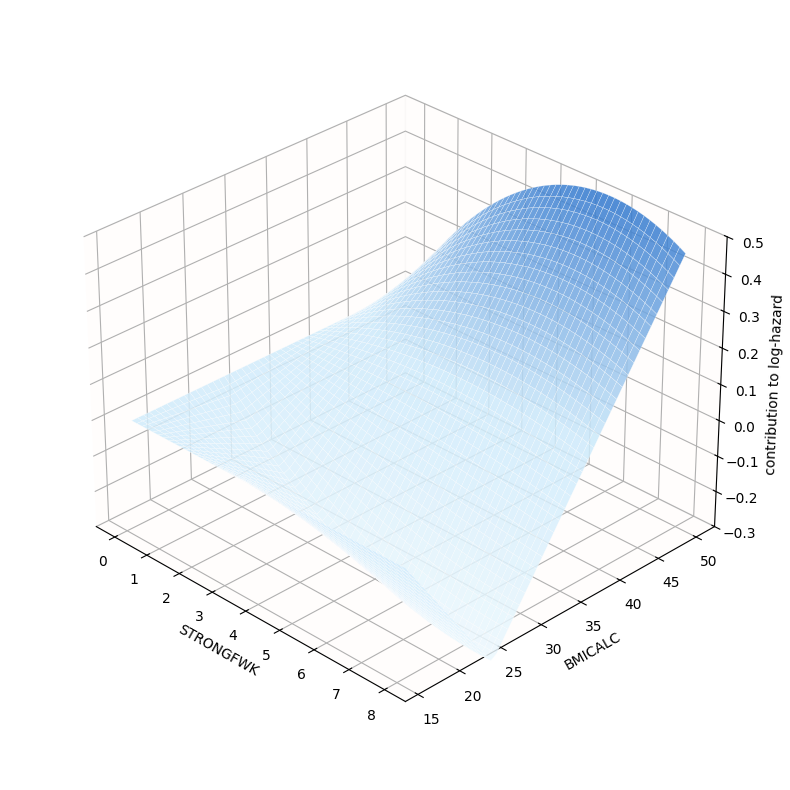

In [64]:
# define coefficient values from the fitted Cox model
beta_11 = cph.params_["SF_BMI_11"]
beta_12 = cph.params_["SF_BMI_12"]
beta_21 = cph.params_["SF_BMI_21"]
beta_22 = cph.params_["SF_BMI_22"]

# create a meshgrid for MOD10FWK and CIGSDAY values
SF_range = np.linspace(df_train_cph3_copy["STRONGFWK"].min(), df_train_cph3_copy["STRONGFWK"].max(), 50)
BMI_range = np.linspace(df_train_cph3_copy["BMICALC"].min(), df_train_cph3_copy["BMICALC"].max(), 50)
SF_grid, BMI_grid = np.meshgrid(SF_range, BMI_range)

# compute spline transformations for the grid
sf_spline_grid = dmatrix(sf_spline_train.design_info, {"STRONGFWK": SF_grid.ravel()}, return_type="dataframe")
bmi_spline_grid = dmatrix(bmi_spline_train.design_info, {"BMICALC": BMI_grid.ravel()}, return_type="dataframe")

# compute interaction terms
SF_BMI_11_grid = sf_spline_grid.iloc[:, 0] *bmi_spline_grid.iloc[:, 0]
SF_BMI_12_grid = sf_spline_grid.iloc[:, 0] * bmi_spline_grid.iloc[:, -1]
SF_BMI_21_grid = sf_spline_grid.iloc[:, -1] * bmi_spline_grid.iloc[:, 0]
SF_BMI_22_grid = sf_spline_grid.iloc[:, -1] * bmi_spline_grid.iloc[:, -1]

# compute cumulative log-hazard
log_hazard_grid = (beta_11 * SF_BMI_11_grid + beta_12 * SF_BMI_12_grid + 
                   beta_21 * SF_BMI_21_grid + beta_22 * SF_BMI_22_grid).values.reshape(50, 50)

# ---plot---
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(
    MF_grid, BMI_grid, log_hazard_grid,
    cmap=custom_cmap_baby_blue,  
    alpha=0.85,    
    edgecolor="white", linewidth=0.2)  

ax.view_init(elev=30, azim=-45)
ax.set_xlabel("STRONGFWK")
ax.set_ylabel("BMICALC")
ax.set_zlabel("contribution to log-hazard")
ax.set_zlim(-0.3, 0.5) 
ax.set_facecolor("white")  

# adjust the XYZ planes color
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))  
ax.yaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))
ax.zaxis.pane.set_facecolor((1, 0.99, 0.98, 0.98))

ax.set_box_aspect(None, zoom=0.9) 
plt.tight_layout()
plt.savefig("STR_BMI_3D_2222.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [65]:
# ---CPH4 final---

In [66]:
formula="bs(BMICALC, degree=2, df=3) + bs(HRSLEEP, degree=1, df=2) + bs(STRONGFWK, degree=2, df=2) + bs(ALCDAYSYR, degree=1, df=2) + bs(ALCAMT, degree=2, df=2) + bs(POVERTY, degree=2, df=2) +" + " + ".join(df_train_cph3.columns.difference(['TIMETOEVENT', 'MORTSTAT','BMICALC', 'HRSLEEP', 'STRONGFWK', 'ALCDAYSYR', 'ALCAMT', 'POVERTY']))

cph = CoxPHFitter()
cph.fit(df_train_cph3, duration_col='TIMETOEVENT', event_col='MORTSTAT', formula=formula)

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 82720 total observations, 78101 right-censored observations>
             duration col = 'TIMETOEVENT'
                event col = 'MORTSTAT'
      baseline estimation = breslow
   number of observations = 82720
number of events observed = 4619
   partial log-likelihood = -45485.23
         time fit was run = 2025-03-10 01:43:34 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
bs(BMICALC, degree=2, df=3)[1]   -1.14      0.32      0.14           -1.41           -0.87                0.24                0.42
bs(BMICALC, degree=2, df=3)[2]   -1.36      0.26      0.11           -1.57           -1.15                0.21                0.32
bs(BMICALC, degree=2, df=3)[3]   -0.73      0.48      0.21           -1.14           -0.31                0.32                0.73
bs(HRSLEEP, degree=1, df=2)[1]   -0.31      0.73      0.10           -0.50           -0.12                0.60                0.89
bs(HRSLEEP, degree=1, df=2)[2]    0.69      1.99      0.11            0.48            0.90                1.62                2.45
bs(STRONGFWK, degree=2, df=2)[1] -0.39      0.68      0.15           -0.68           -0.11                0.51                0.90
bs(STRONGFWK, degree=2, df=2)[2] -0.33      0.72      0.15           -0.63           -0.03                0.53                0.97
bs(ALCDAYSYR, degree=1, df=2)[1] -0.22      0.80      0.08           -0.37           -0.07                0.69                0.93
bs(ALCDAYSYR, degree=1, df=2)[2] -0.35      0.71      0.08           -0.51           -0.18                0.60                0.83
bs(ALCAMT, degree=2, df=2)[1]     0.63      1.89      0.21            0.22            1.05                1.24                2.87
bs(ALCAMT, degree=2, df=2)[2]     0.24      1.27      0.15           -0.04            0.52                0.96                1.69
bs(POVERTY, degree=2, df=2)[1]   -0.05      0.95      0.09           -0.22            0.13                0.80                1.14
bs(POVERTY, degree=2, df=2)[2]   -0.43      0.65      0.06           -0.55           -0.32                0.58                0.73
AEFFORT                           0.07      1.07      0.02            0.03            0.11                1.03                1.12
AFEELINT1MO                      -0.04      0.96      0.02           -0.08           -0.01                0.92                0.99
AGE                               0.07      1.08      0.00            0.07            0.08                1.07                1.08
AGE_CANCEREV                      0.01      1.02      0.00            0.01            0.02                1.01                1.02
AGE_KIDNEYWKYR                    0.02      1.02      0.00            0.01            0.02                1.01                1.02
ALC5UPYR                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ALCSTAT1_2                        0.02      1.02      0.04           -0.07            0.10                0.93                1.11
ALCSTAT1_3                       -0.19      0.83      0.09           -0.37           -0.01                0.69                0.99
ARTHGLUPEV                       -0.03      0.97      0.03           -0.09            0.03                0.91                1.03
AWORTHLESS                        0.01      1.01      0.02           -0.03            0.05                0.97                1.06
BLIND                             0.57      1.77      0.11            0.36            0.78                1.43                2.19
CANCEREV                          1.64      5.14      0.24            1.17            2.10                3.23                8.16
CANCEREV_HYPERTENEV              -0.28      0.76      0.07           -0.42           -0

In [67]:
print(f'APLL_is: {cph.score(df_train_cph3, scoring_method="log_likelihood"):.4f}')
print(f'APLL_os: {cph.score(df_test_cph3, scoring_method="log_likelihood"):.4f}')
print(f'C_is: {cph.score(df_train_cph3, scoring_method="concordance_index"):.4f}')
print(f'C_os: {cph.score(df_test_cph3, scoring_method="concordance_index"):.4f}')

APLL_is: -0.5499
APLL_os: -0.4600
C_is: 0.8865
C_os: 0.8909


In [68]:
# predict the survival function for each individual
survival_probs_16_train = cph.predict_survival_function(df_train_cph3)
survival_probs_16_test = cph.predict_survival_function(df_test_cph3)

# extract 3y survival probabilities
survival_prob_3y_train = survival_probs_16_train.iloc[3] 
survival_prob_3y_test = survival_probs_16_test.iloc[3] 

# get 3-year event status based on TIMETOEVENT and MORTSTAT
status_3y_train = np.where((df_train_cph3["MORTSTAT"] == 1) & (df_train_cph3["TIMETOEVENT"] <= 3), 0, 1)
status_3y_test = np.where((df_test_cph3["MORTSTAT"] == 1) & (df_test_cph3["TIMETOEVENT"] <= 3), 0, 1)

print(f'log-loss is: {log_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'log-loss os: {log_loss(status_3y_test, survival_prob_3y_test):.4f}')
print(f'BS is: {brier_score_loss(status_3y_train, survival_prob_3y_train):.4f}')
print(f'BS os: {brier_score_loss(status_3y_test, survival_prob_3y_test):.4f}')

log-loss is: 0.1117
log-loss os: 0.1095
BS is: 0.0294
BS os: 0.0292


In [69]:
# save for next model
df_train_cph3.to_csv("df_train_cph3.csv", index=False)
df_test_cph3.to_csv("df_test_cph3.csv", index=False)